### import all library that is used in that whole project

In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


#### read all csv files

In [111]:
df1=pd.read_csv('state_wise_crop_production.csv')
df2=pd.read_csv('crop_production.csv')
df3=pd.read_csv('cpdata.csv')
df4=pd.read_csv('cropproductiononvariousfactors.csv')
df5=pd.read_csv('cropph.csv')

#### look at dtype of column names and there informations

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189232 entries, 0 to 189231
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Rainfall        189232 non-null  float64
 1   Temperature     189232 non-null  float64
 2   Ph              189232 non-null  float64
 3   Crop            189232 non-null  object 
 4   Production      189232 non-null  float64
 5   Cropconversion  189232 non-null  object 
dtypes: float64(4), object(2)
memory usage: 8.7+ MB


In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    58 non-null     object 
 1    Ph     58 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


#### EDA - checking whether there are null values or not

In [112]:
print("null values in df1",df1.isnull().sum())

null values in df1 Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64


In [113]:
print("null values in df2",df2.isnull().sum())

null values in df2 State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [49]:
print("null values in df3",df3.isnull().sum())

null values in df3 temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [50]:
print("null values in df4",df4.isnull().sum())

null values in df4 Rainfall          0
Temperature       0
Ph                0
Crop              0
Production        0
Cropconversion    0
dtype: int64


In [51]:
print("null values in df5",df5.isnull().sum())

null values in df5 Crop    0
 Ph     0
dtype: int64


#### df2 has null values , so replacing them with mean

In [114]:
df2.fillna(df2["Production"].mean(),inplace=True)

### find which crop is best in specific state using bar graph

#### craete a group to find maximum produce crop in every state

In [121]:
grp1=(df2.groupby('State_Name').agg({'Production':'max'}))
grp1=grp1.reset_index()

#### show which crop is mostly produce in state wise and also show production of every crop respectively

In [122]:
print("Most pruduce crop in state wise with production\n")
crop1=pd.DataFrame(columns=['State_Name','Most_produce_crop','Production'])
crop=pd.DataFrame()
for i in grp1.State_Name:
    ind=(np.where(grp1.State_Name==i)[0])[0]
    crop=df2[(df2.State_Name==grp1.State_Name[ind]) & (df2.Production==grp1.Production[ind])]
    crop=crop.drop(['District_Name','Crop_Year','Season','Area'],axis=1)
    crop.columns=['State_Name','Most_produce_crop','Production']
    crop1=pd.concat([crop1,crop],axis=0)
crop1

Most pruduce crop in state wise with production



,State_Name,Most_produce_crop,Production
77,Andaman and Nicobar Islands,Coconut,7.130000e+07
2543,Andhra Pradesh,Coconut,7.801620e+08
11285,Arunachal Pradesh,Turmeric,5.825034e+05
23827,Assam,Coconut,6.071900e+07
39340,Bihar,Sugarcane,9.614539e+06
...,...,...,...
192700,Telangana,Coconut,1.193314e+07
198203,Tripura,Rice,2.825780e+05
218796,Uttar Pradesh,Sugarcane,1.775796e+07
233684,Uttarakhand,Sugarcane,4.630801e+06


#### ploting graph to show which crop and production of crop in every state using bar graph

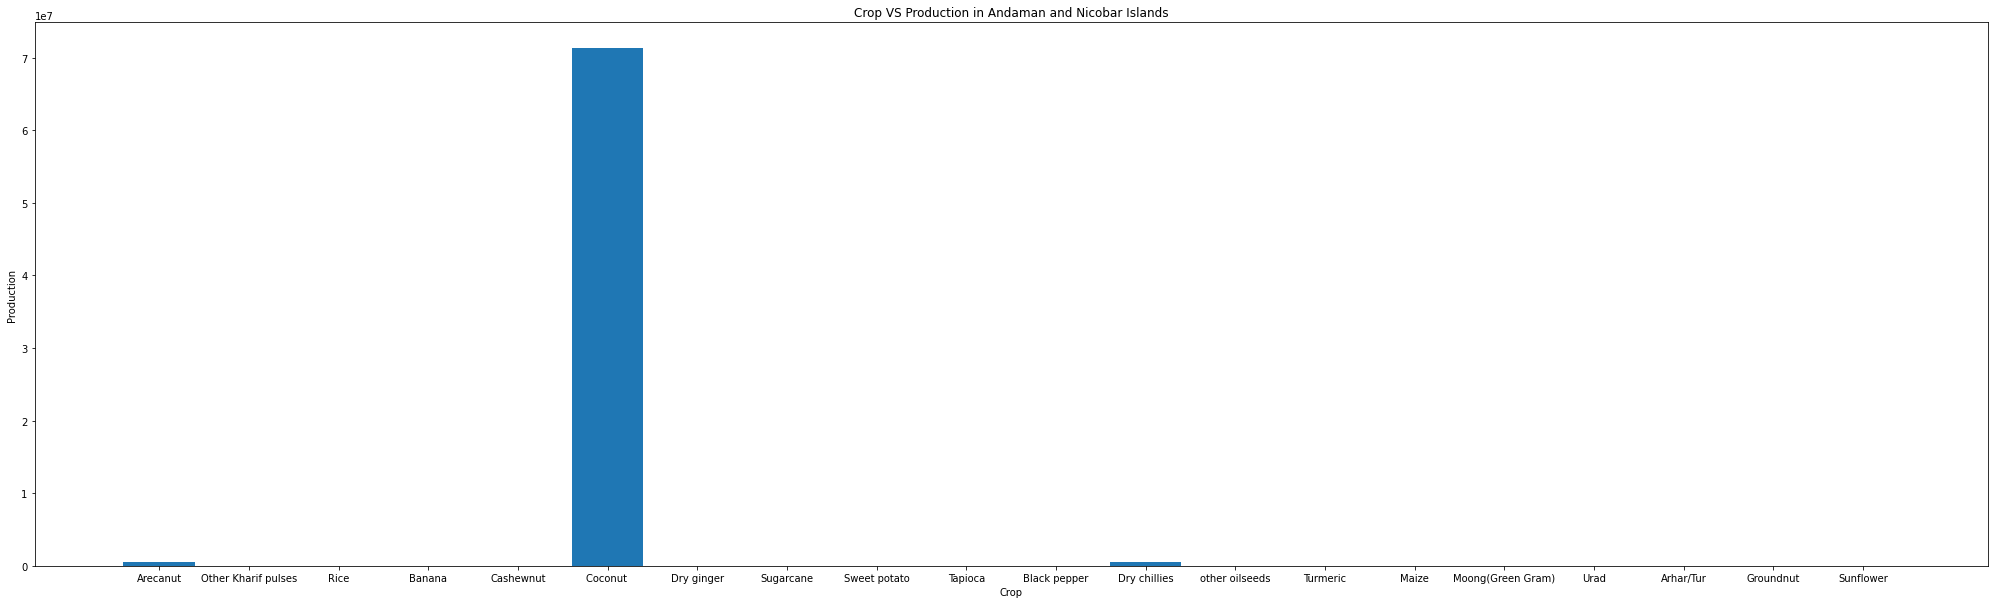

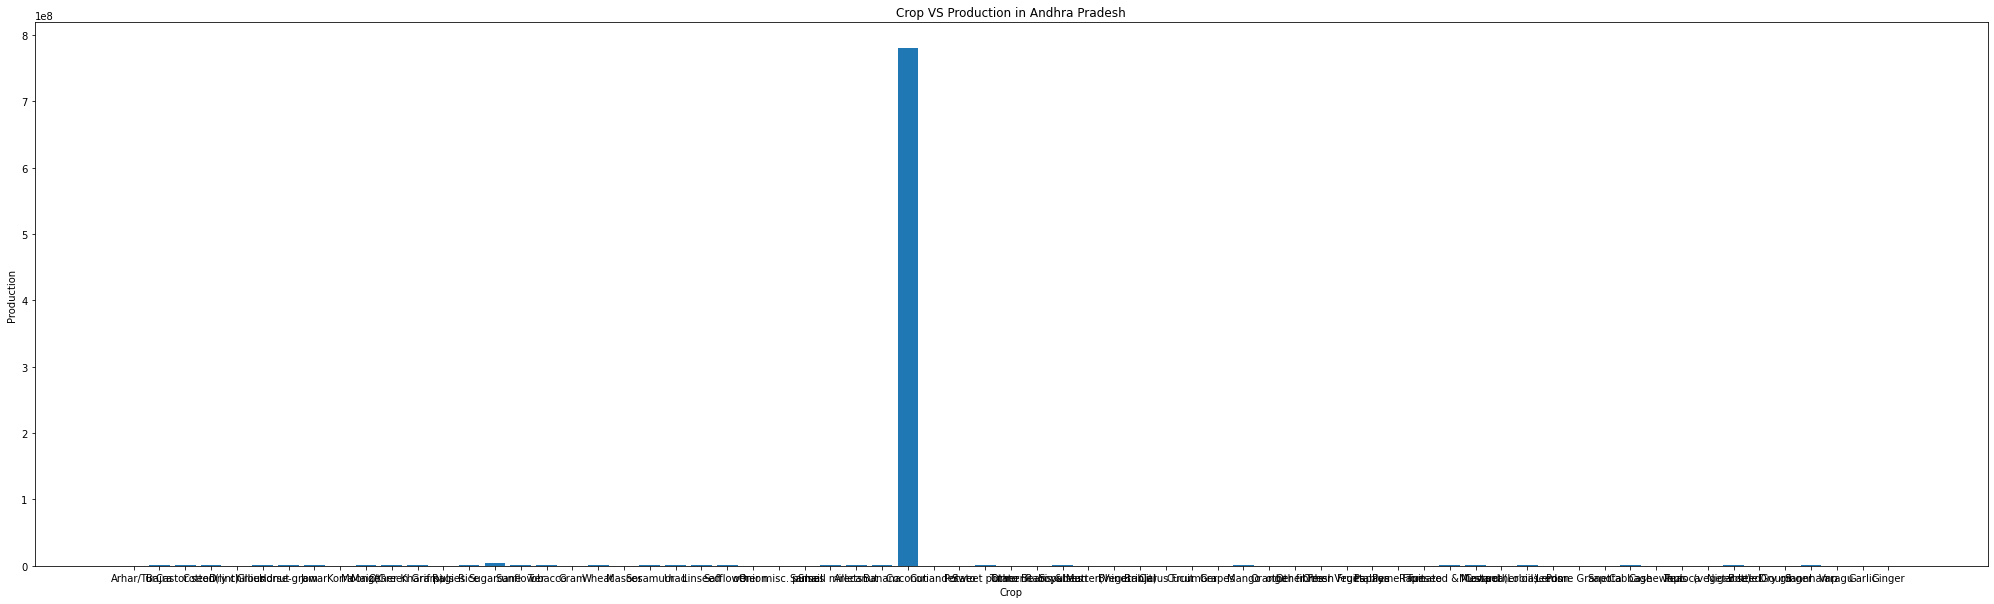

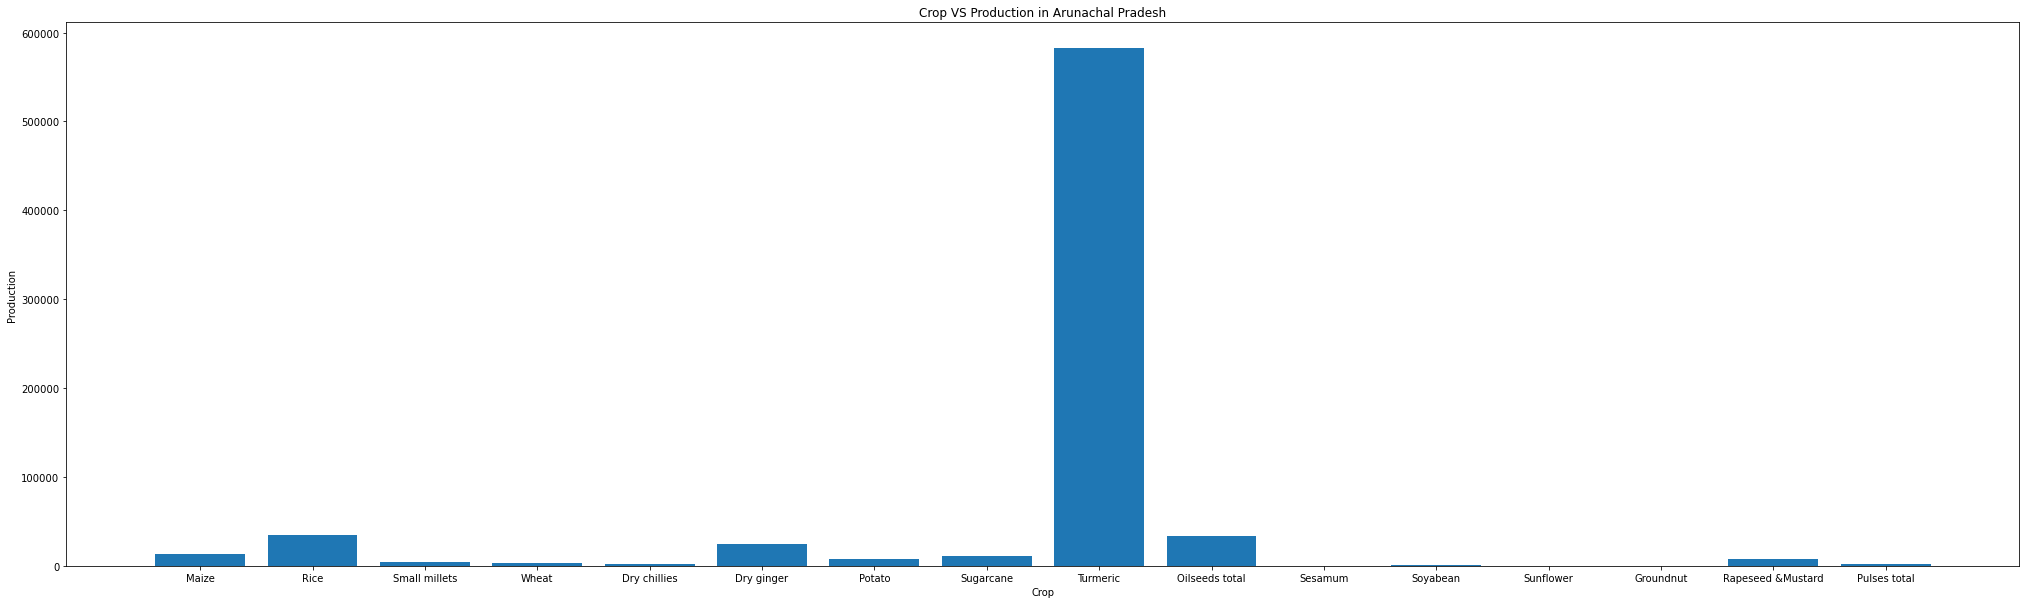

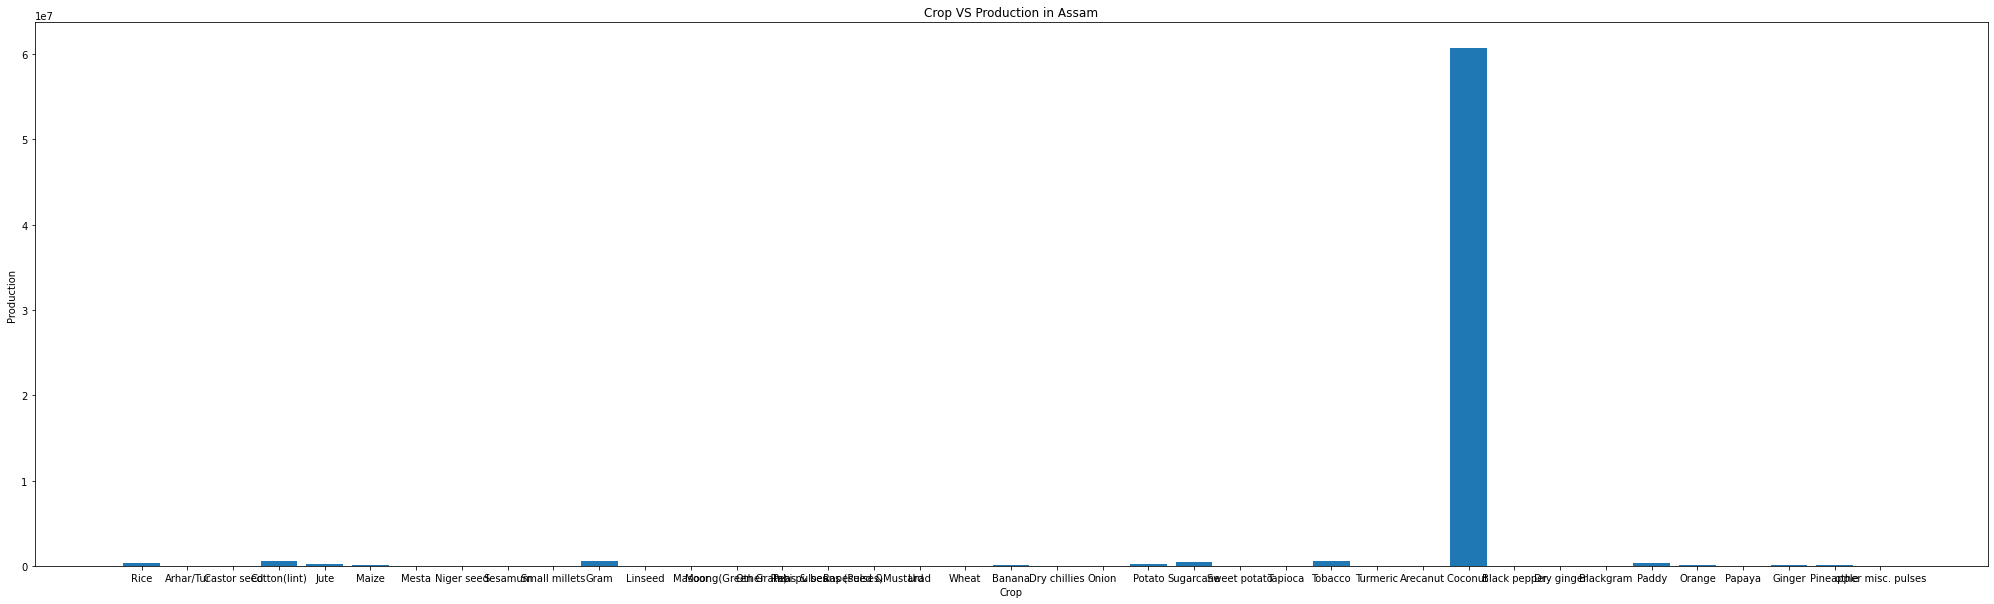

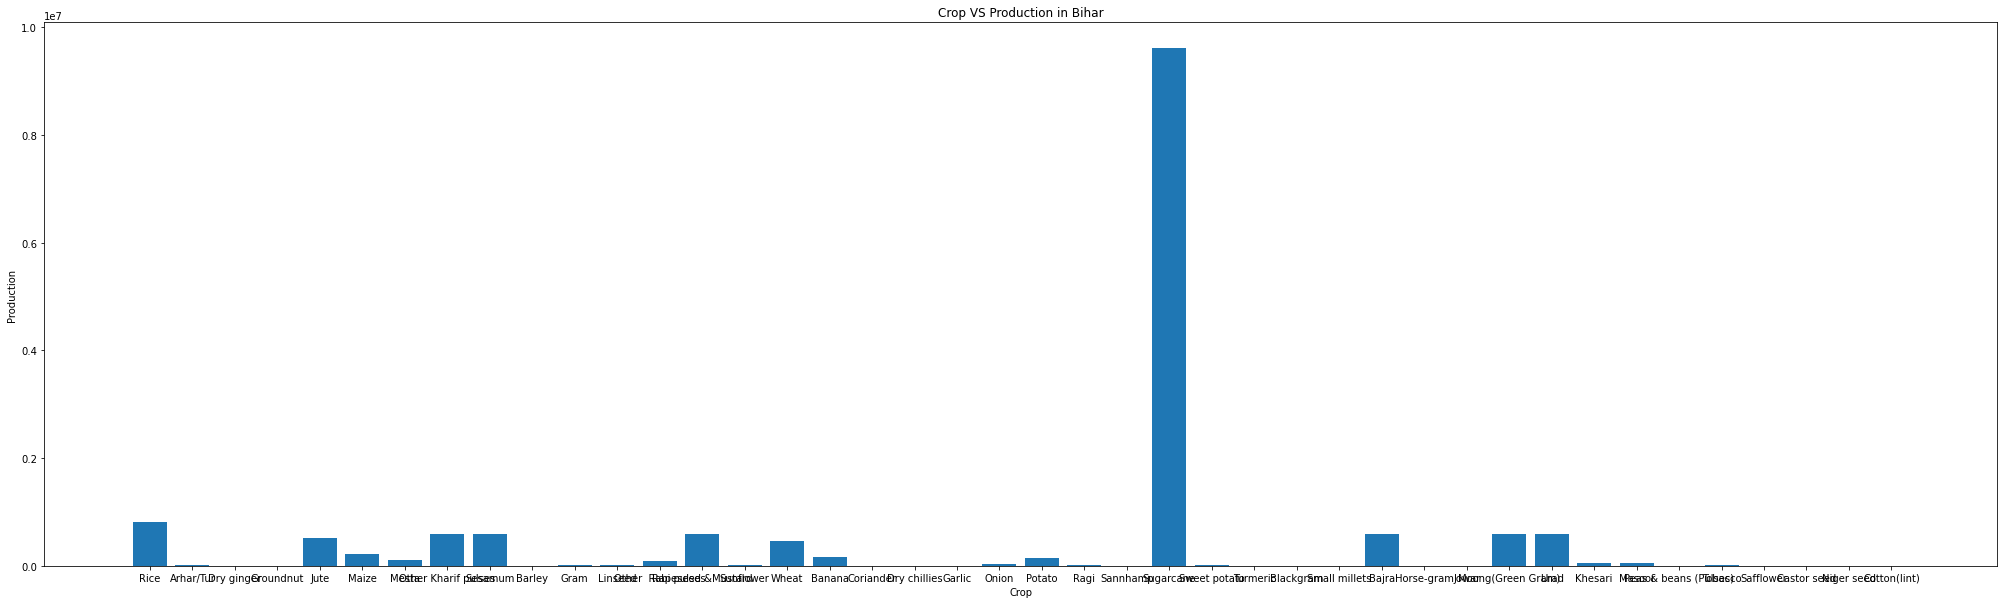

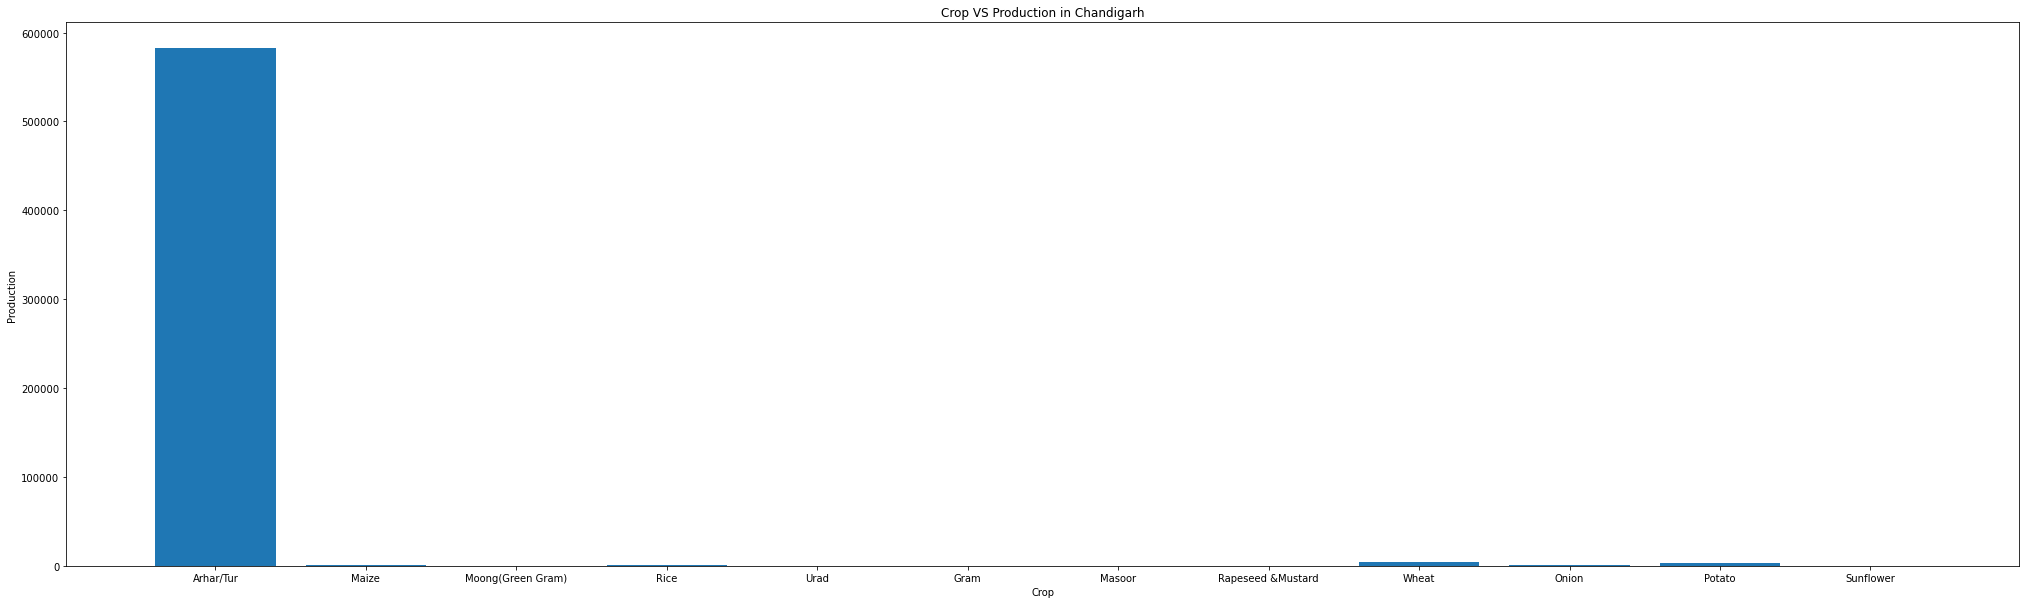

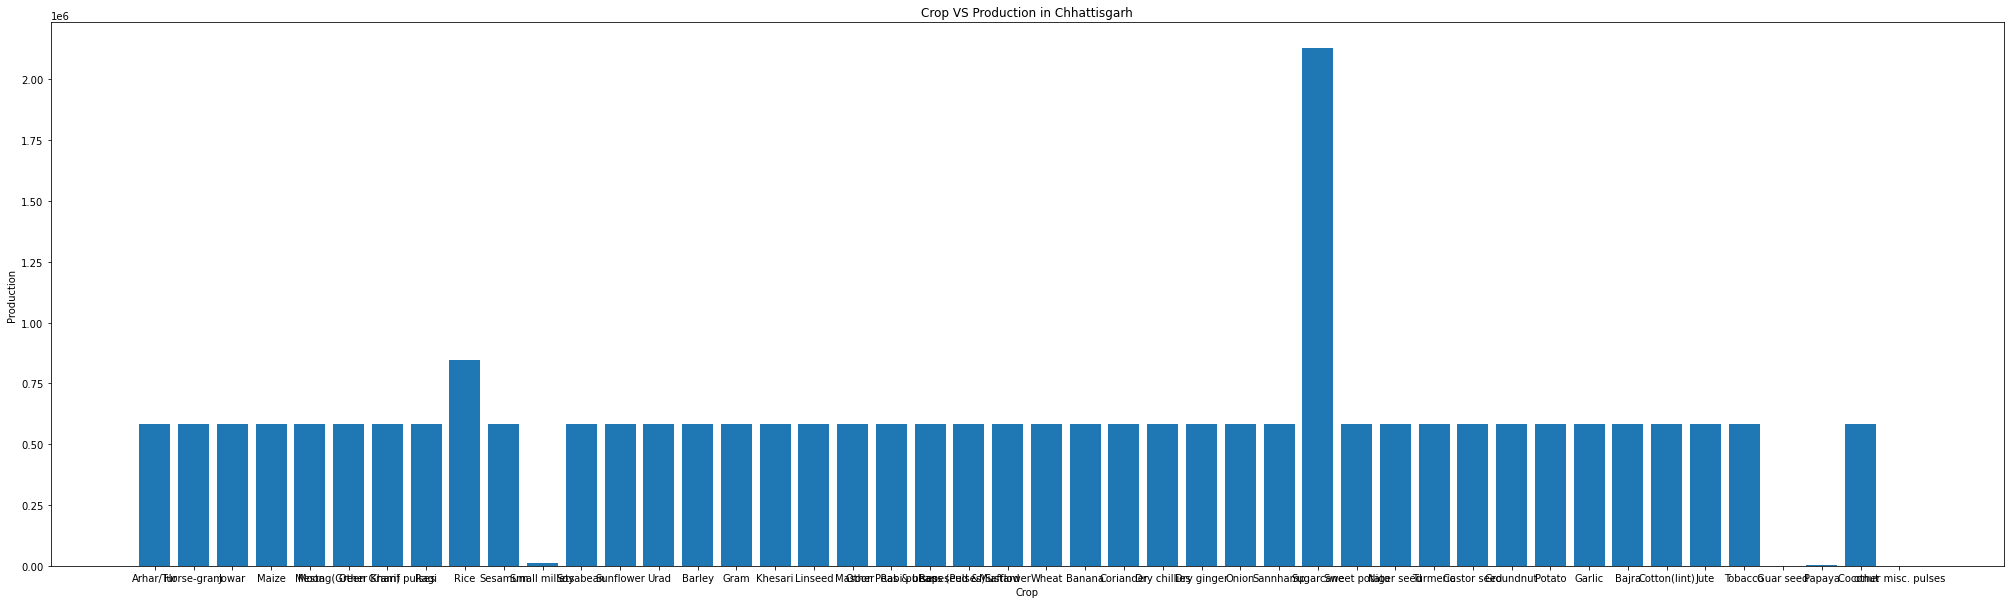

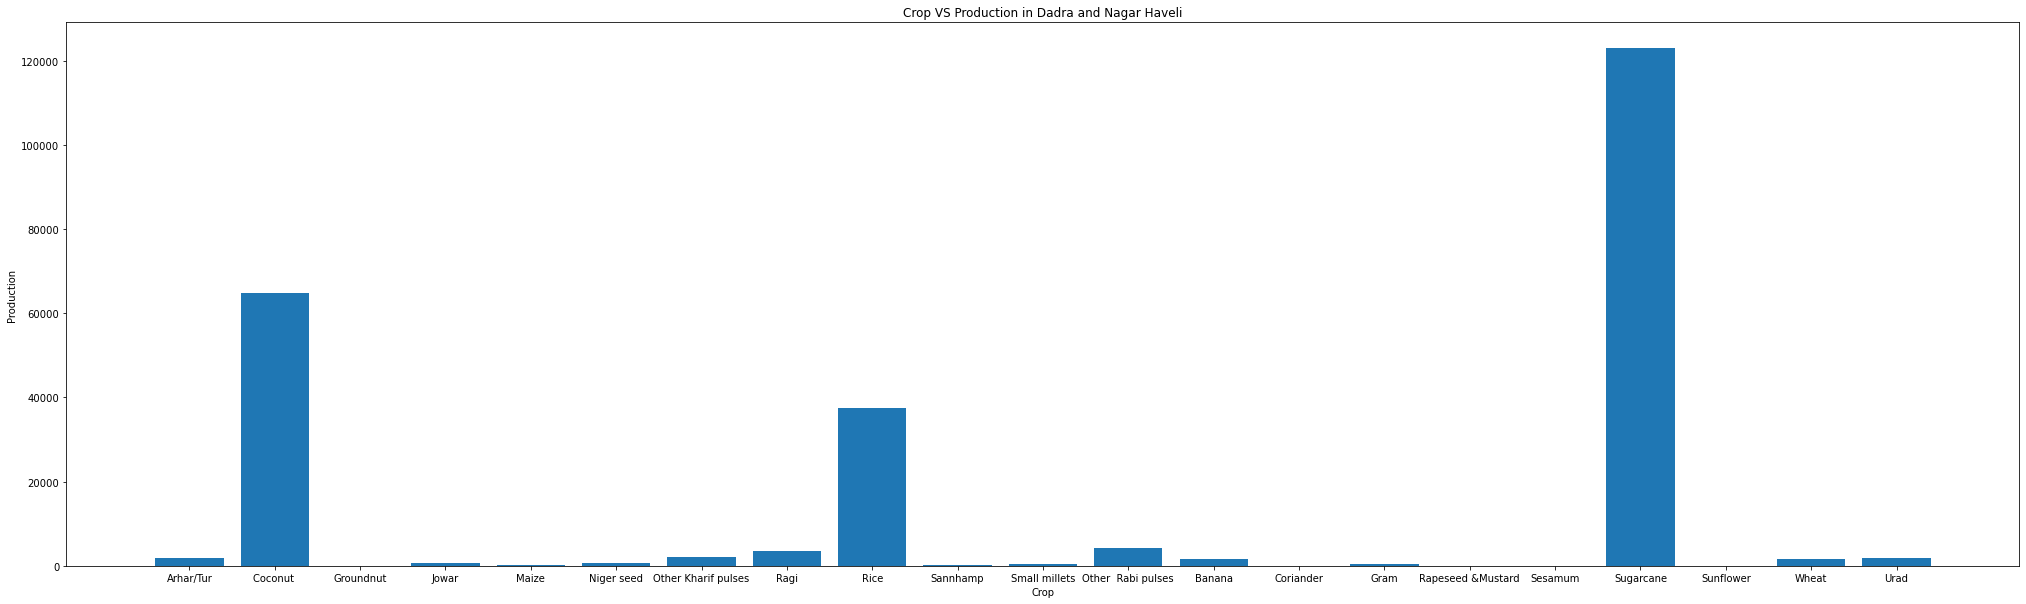

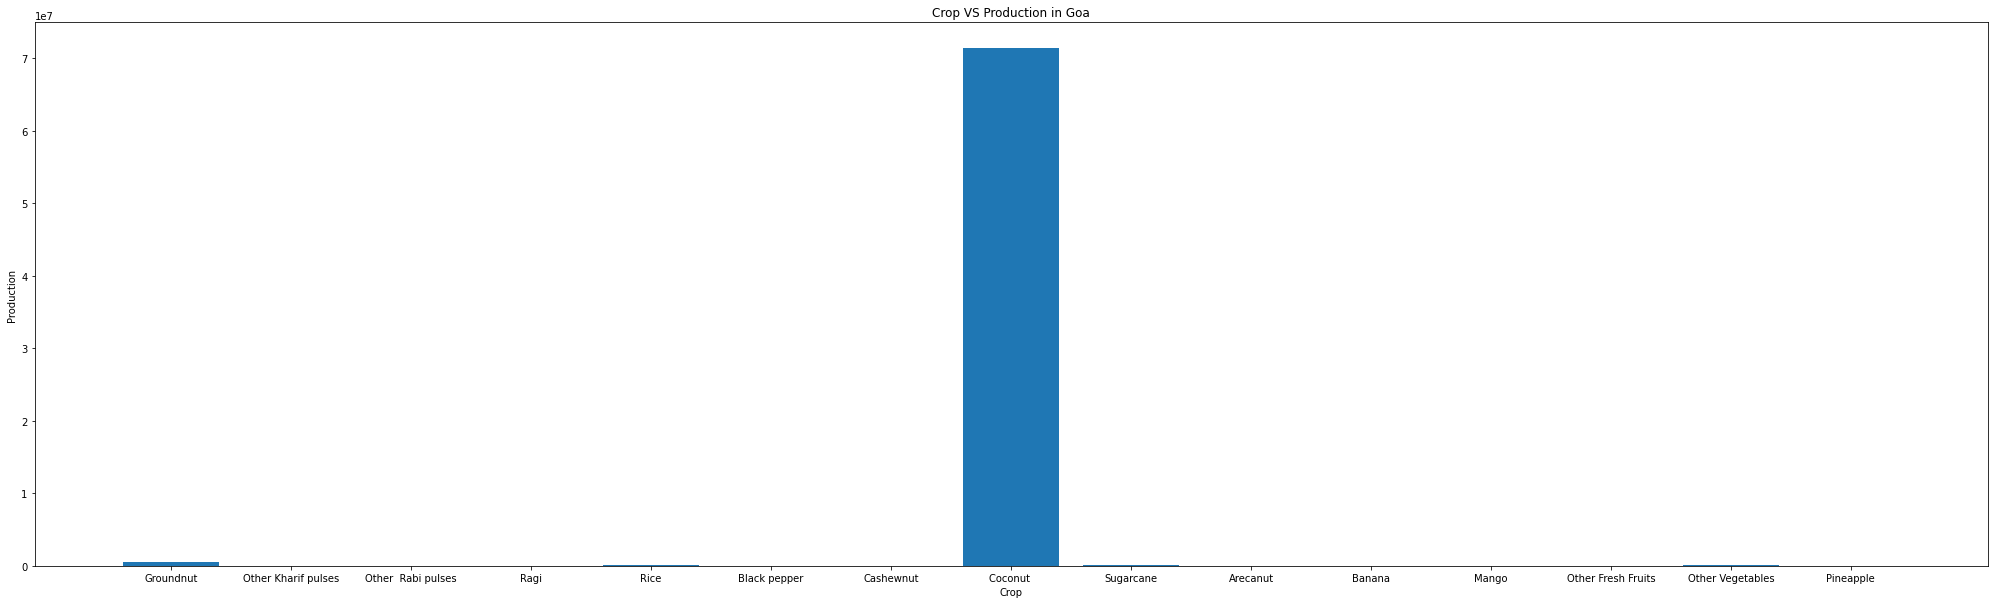

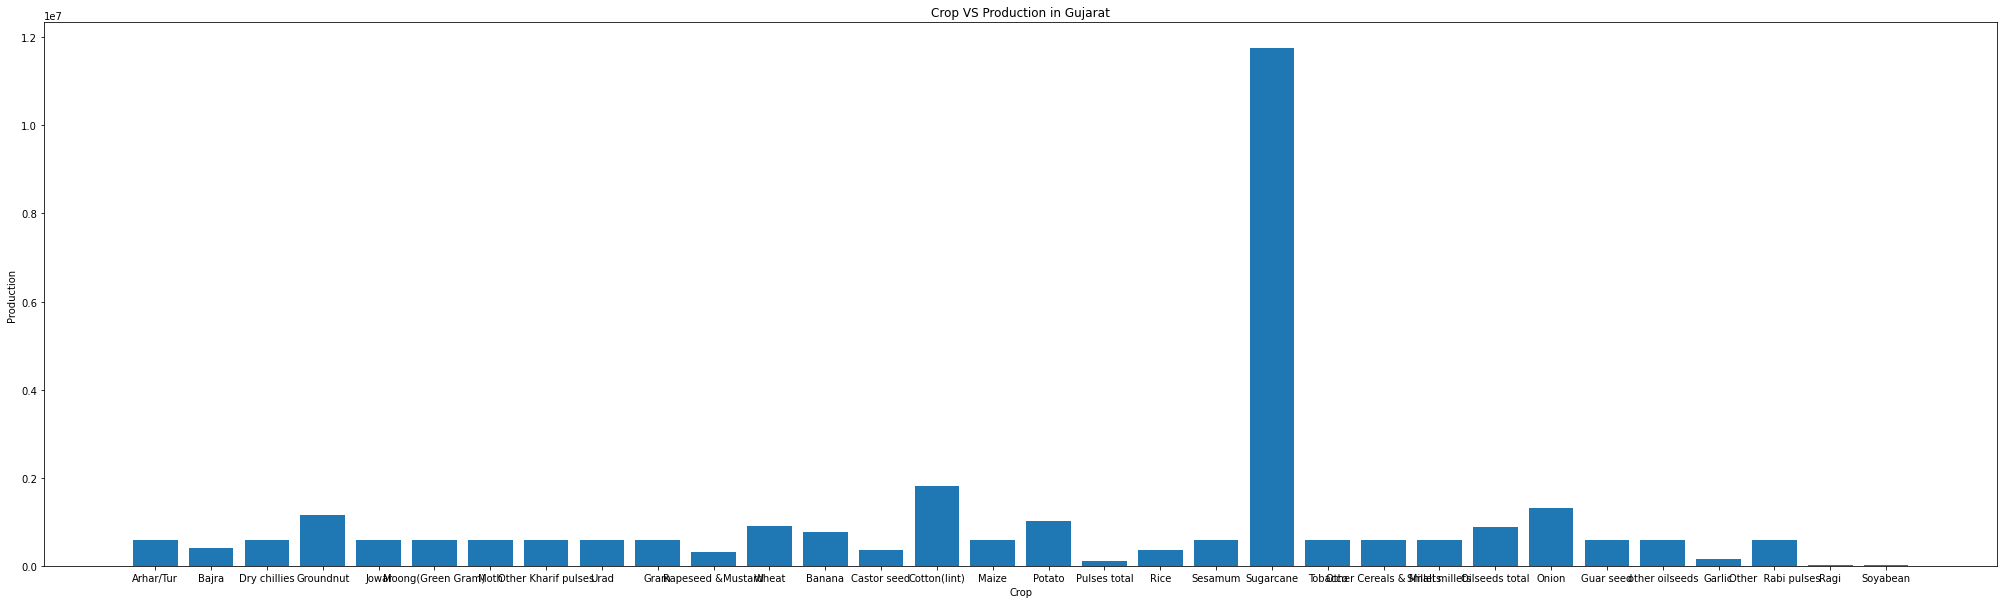

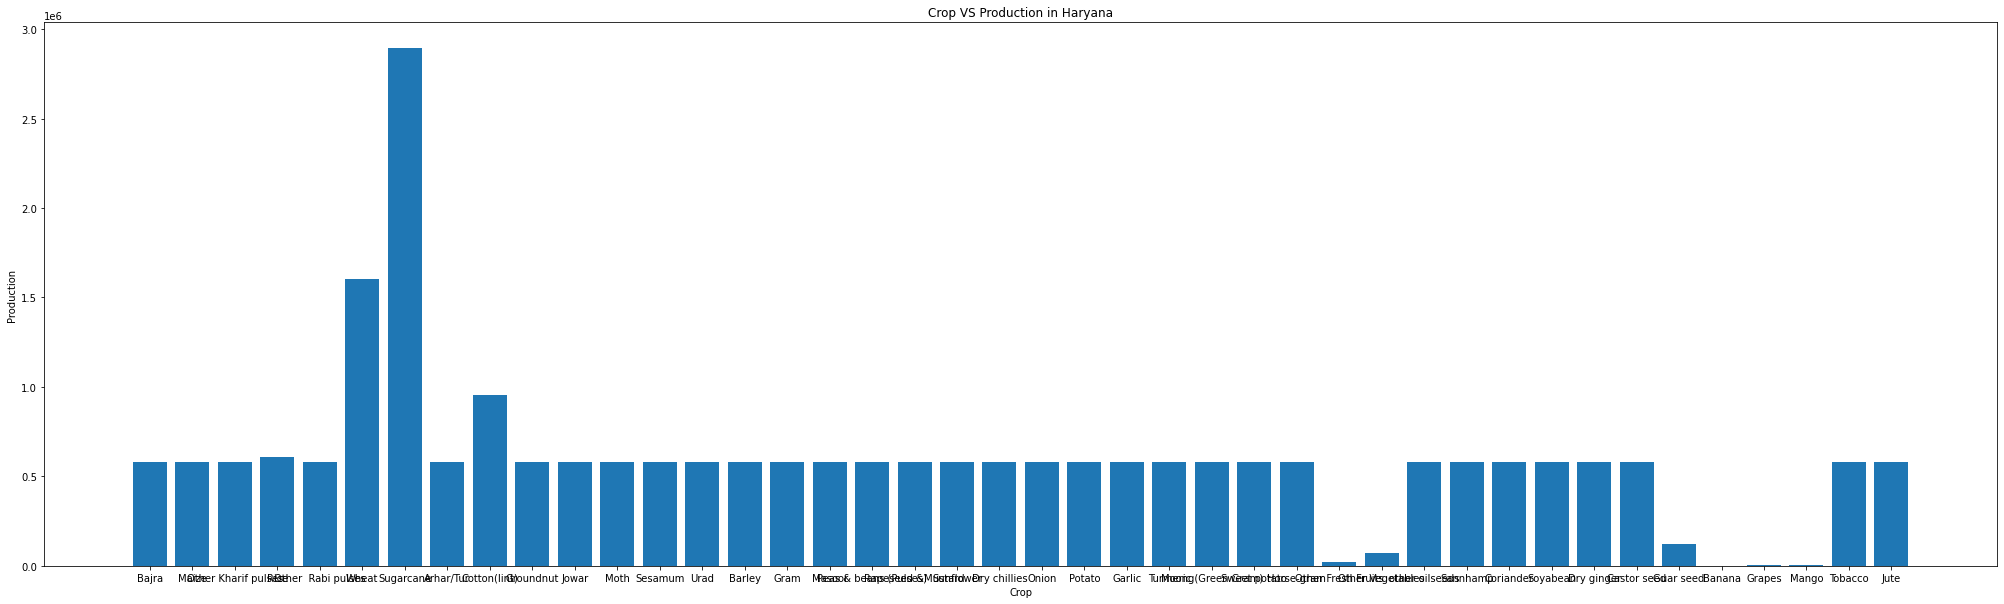

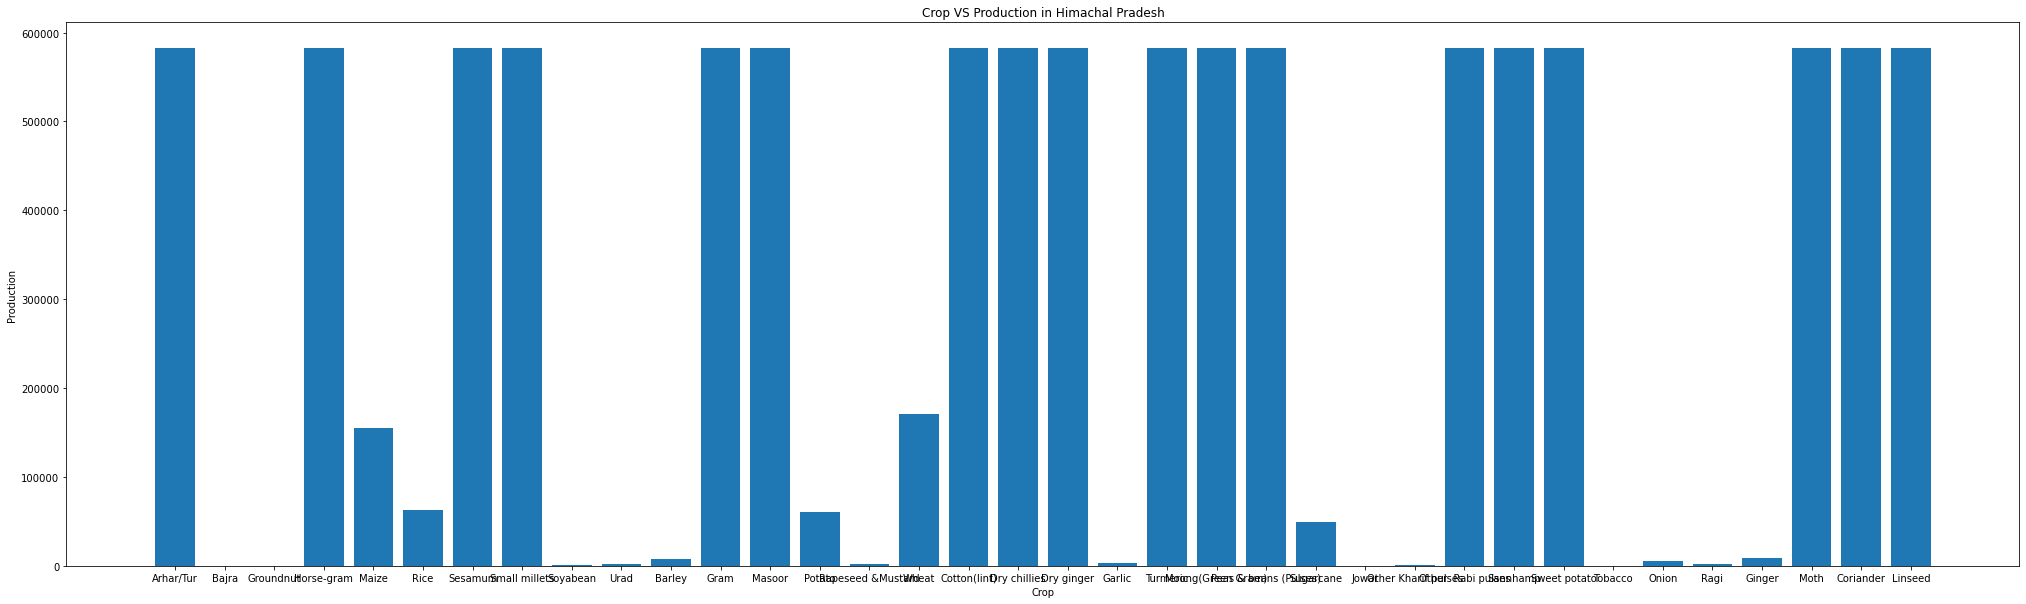

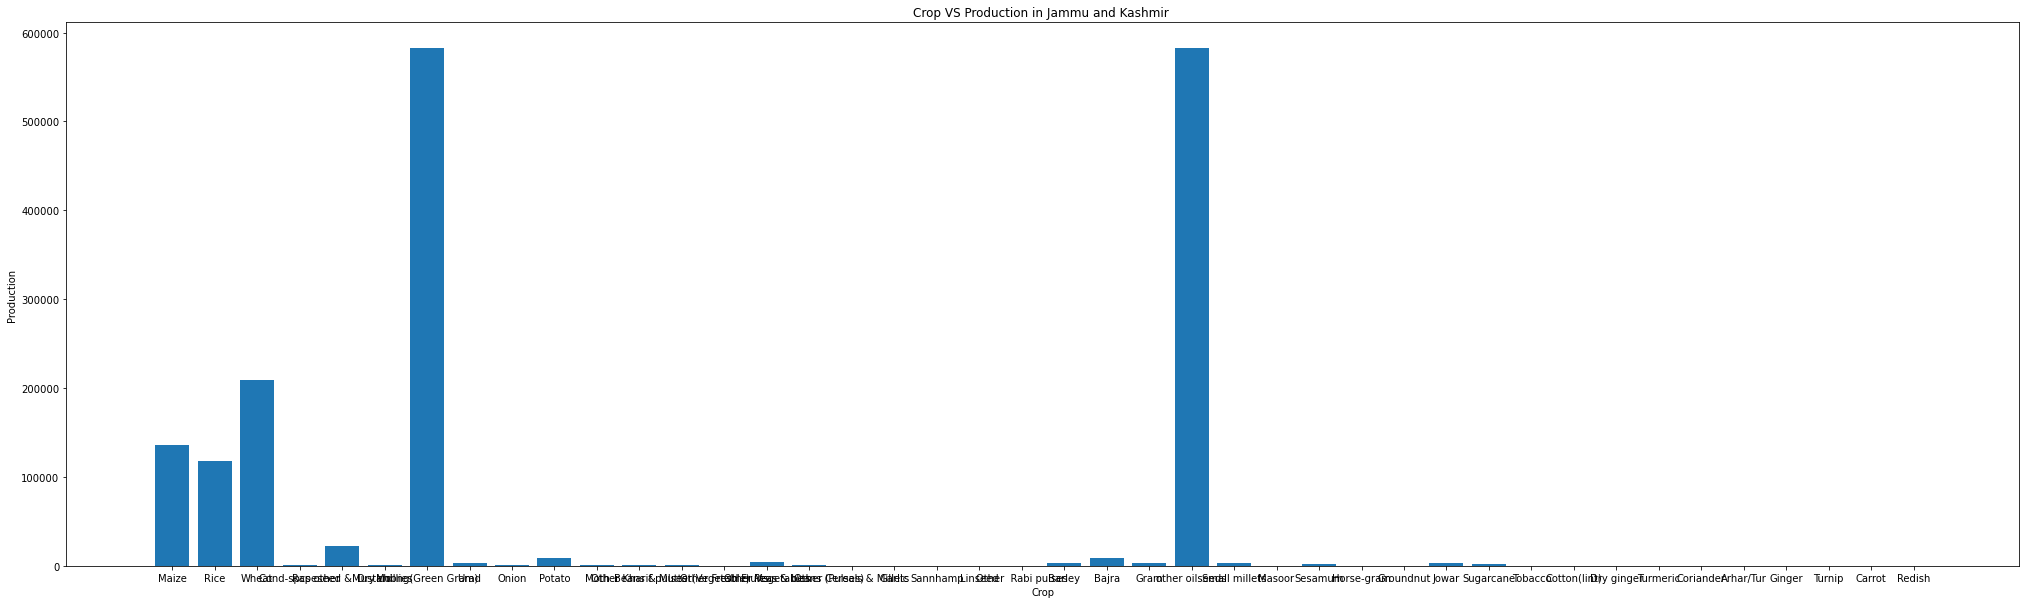

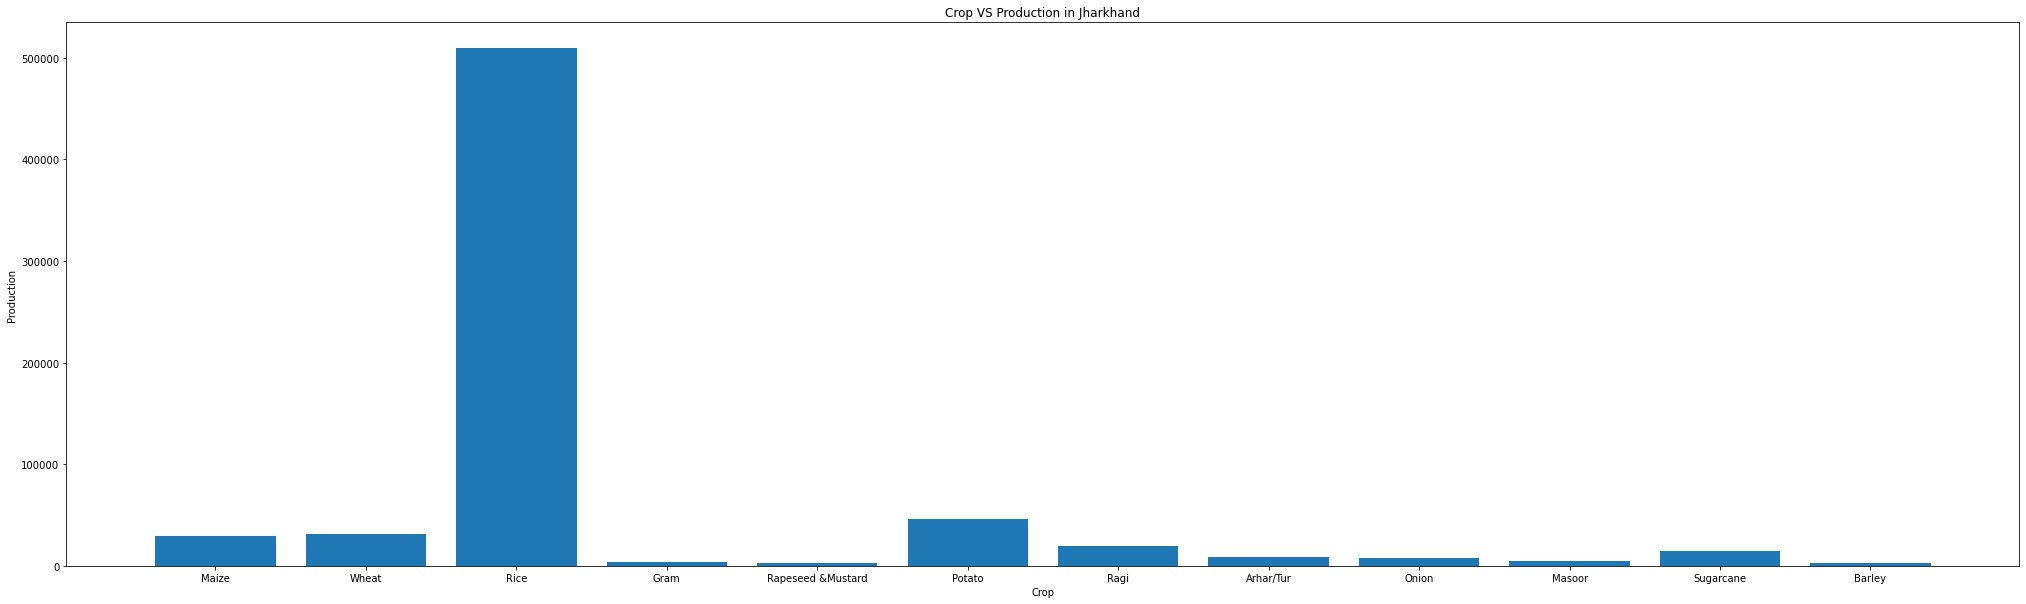

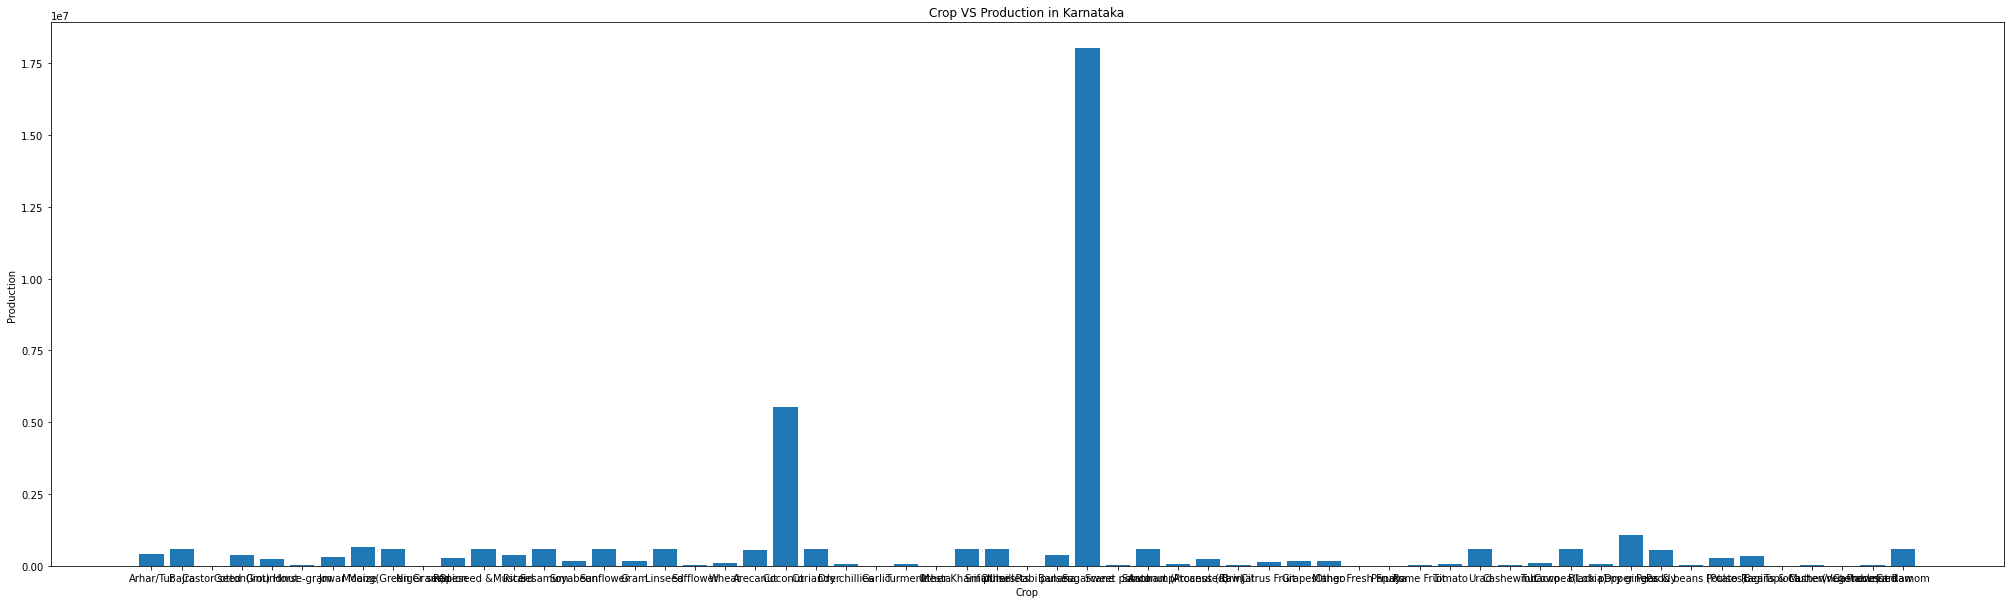

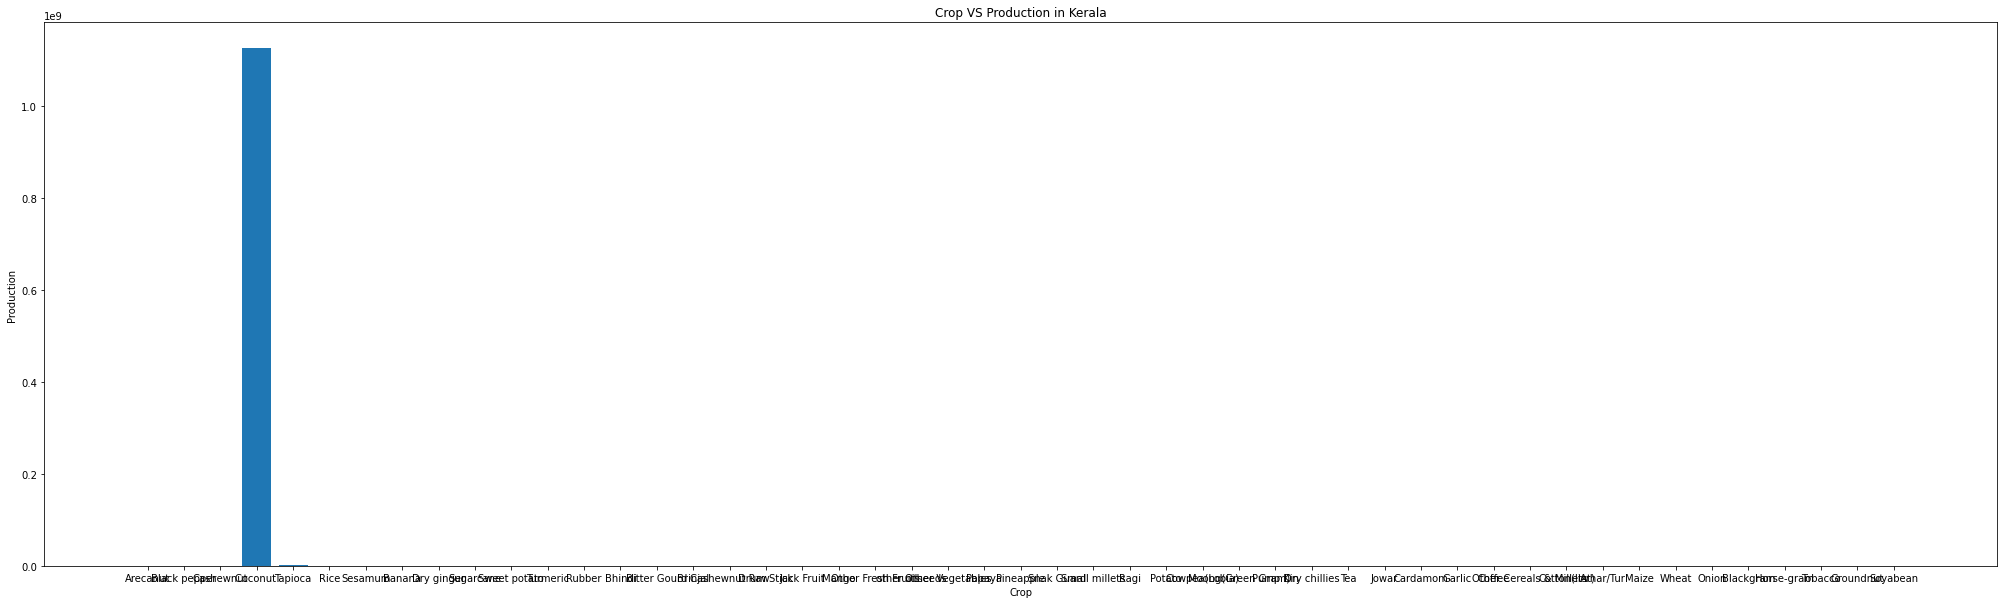

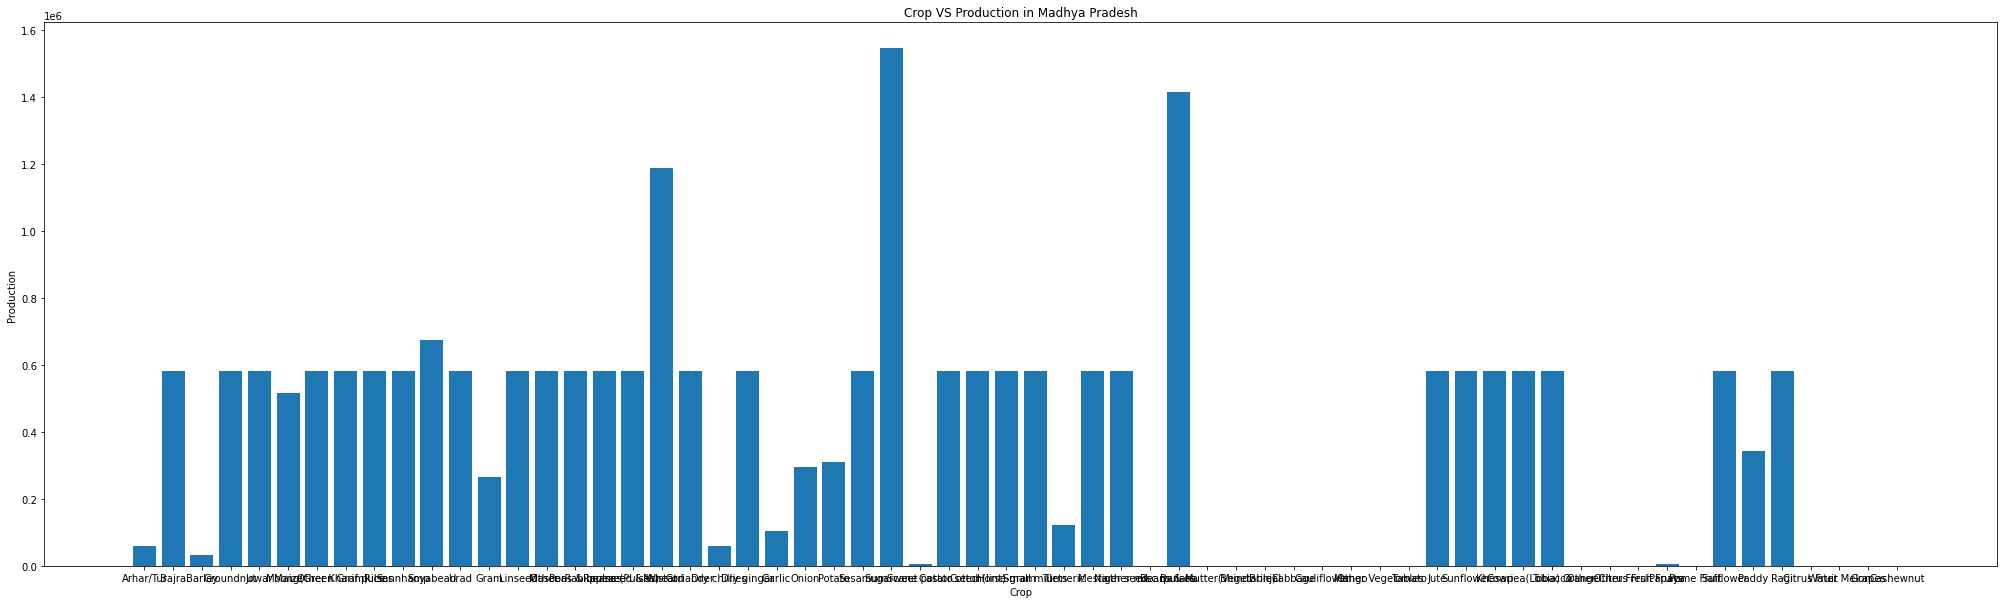

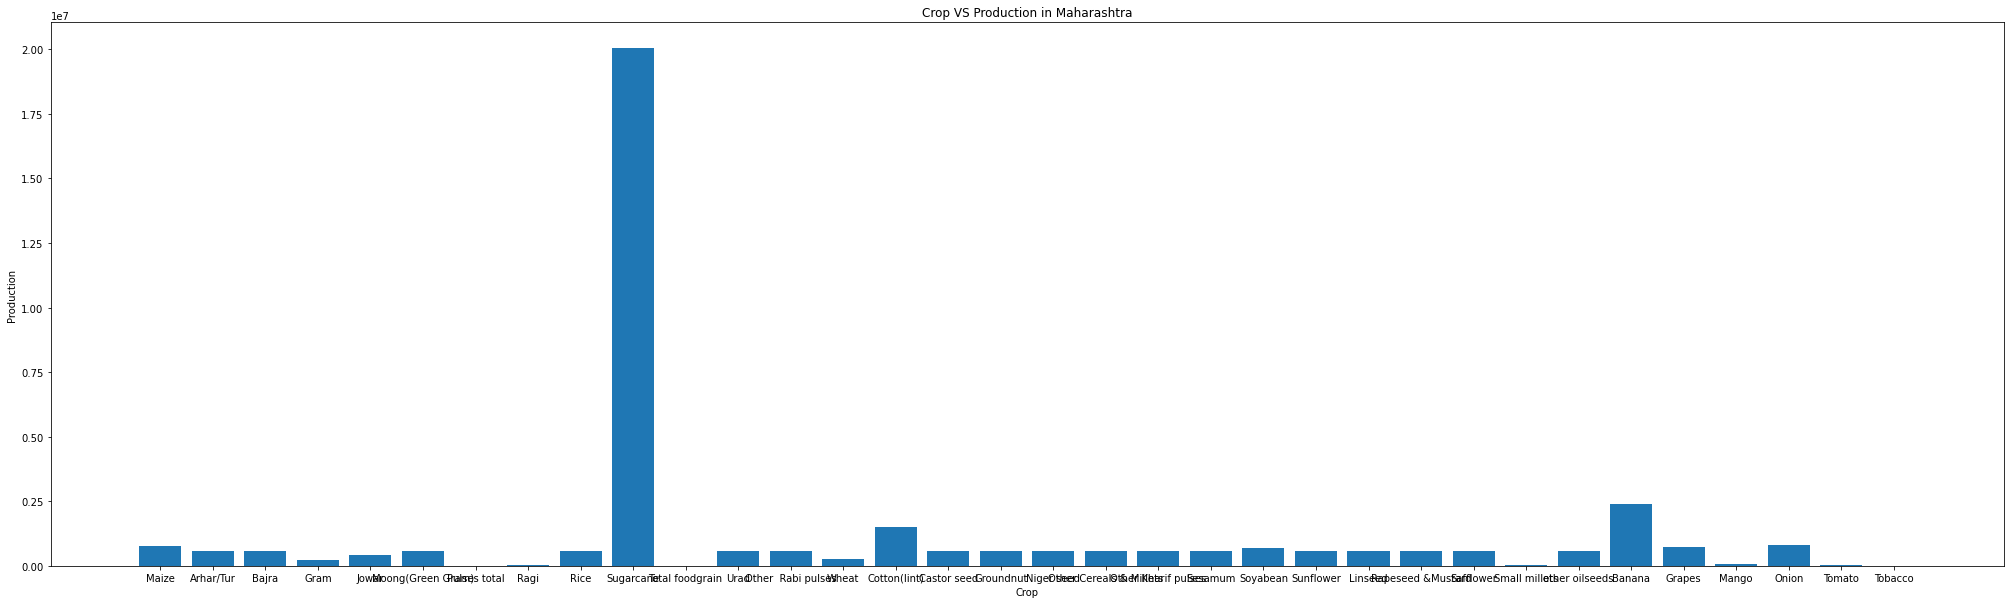

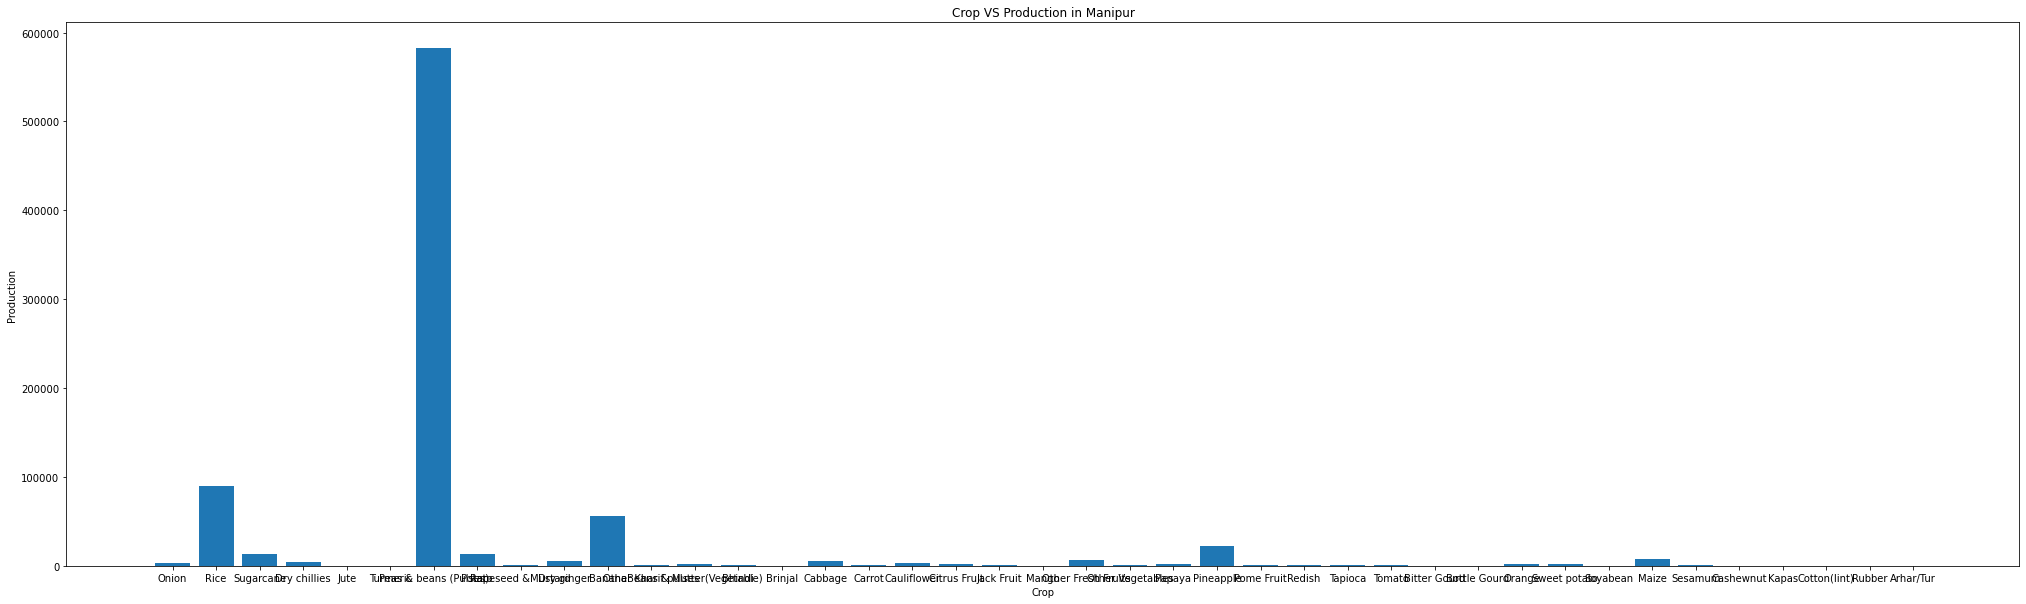

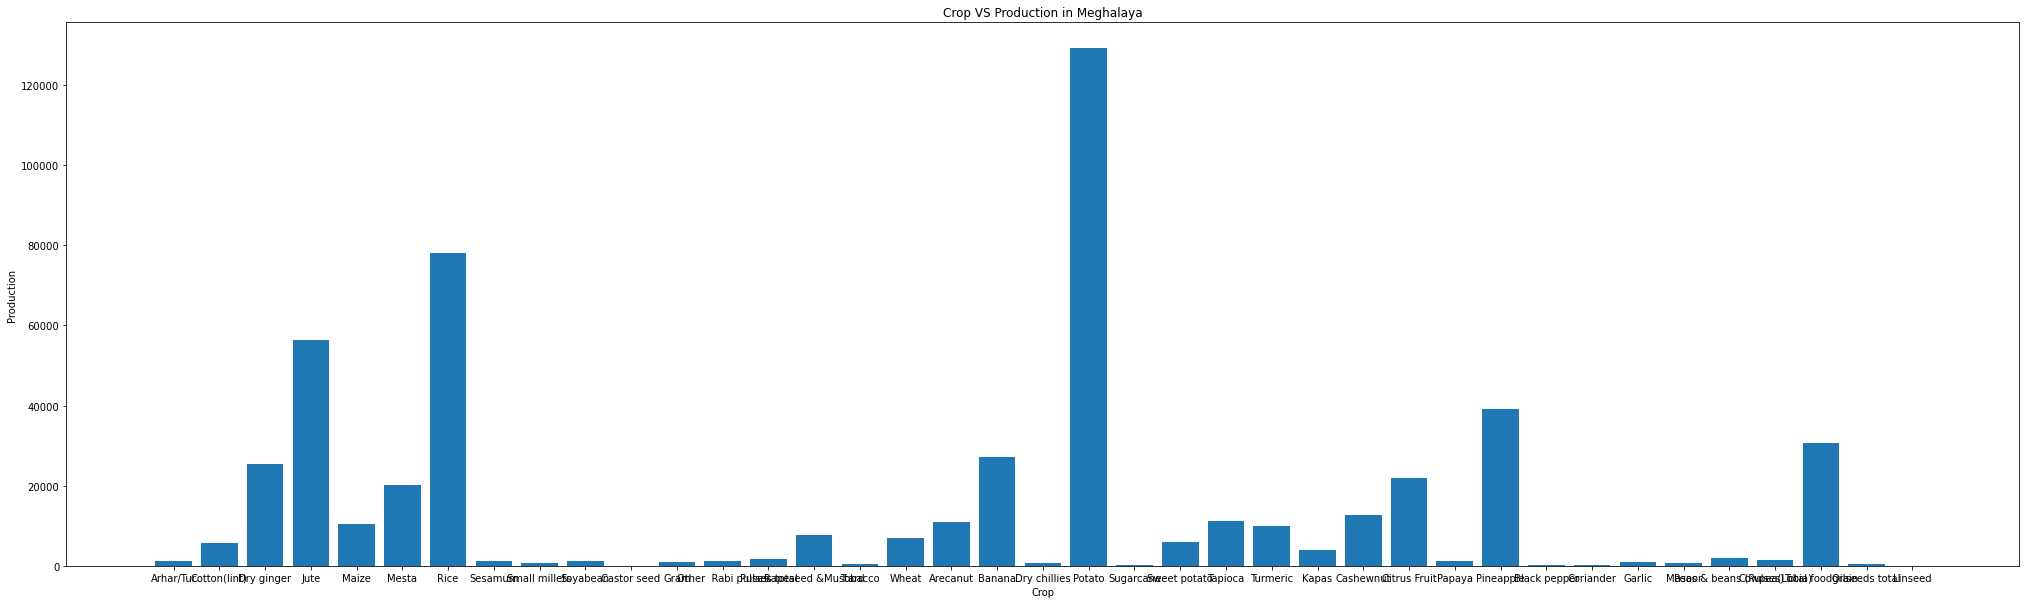

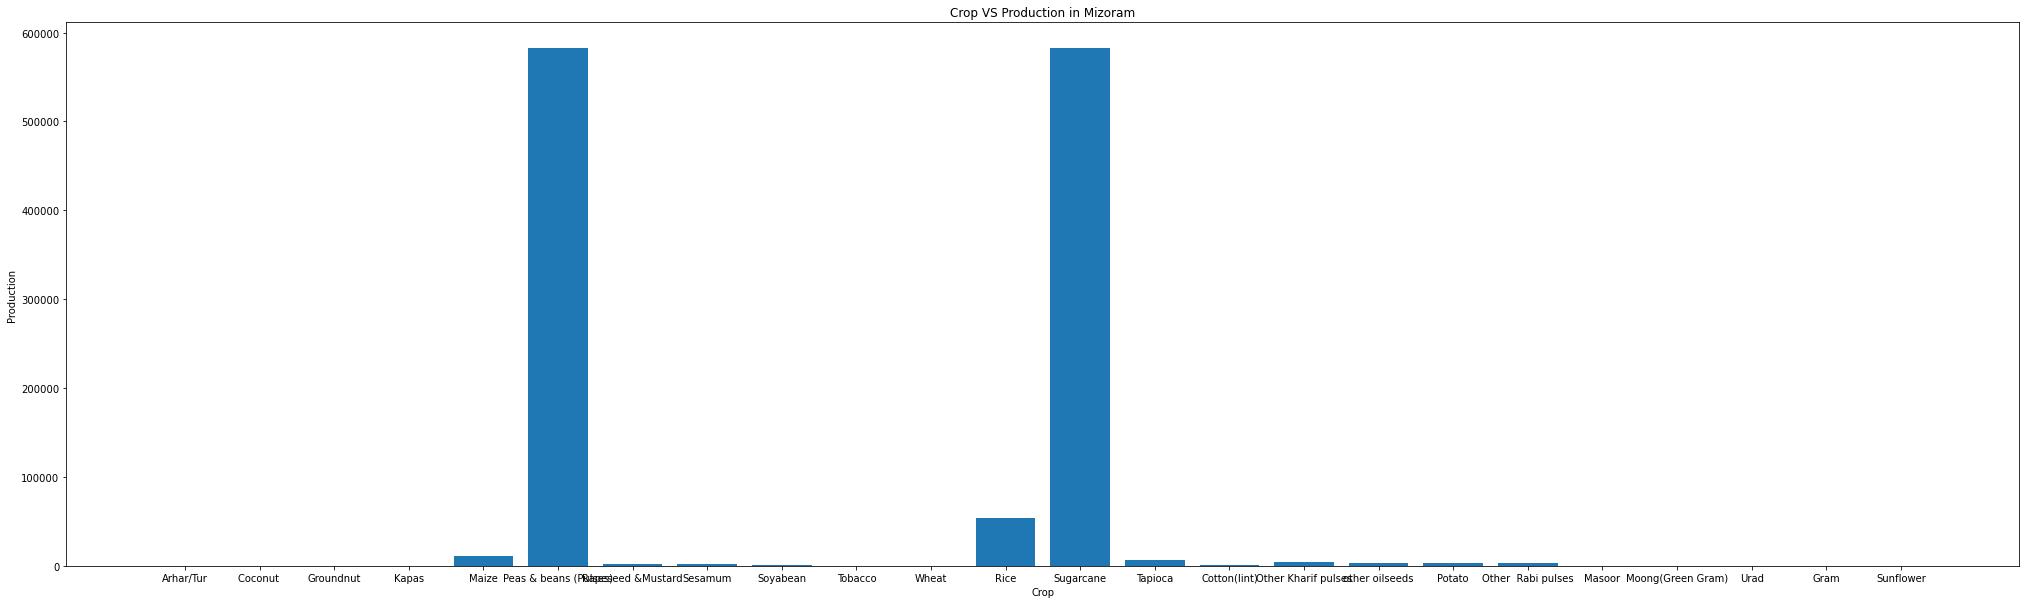

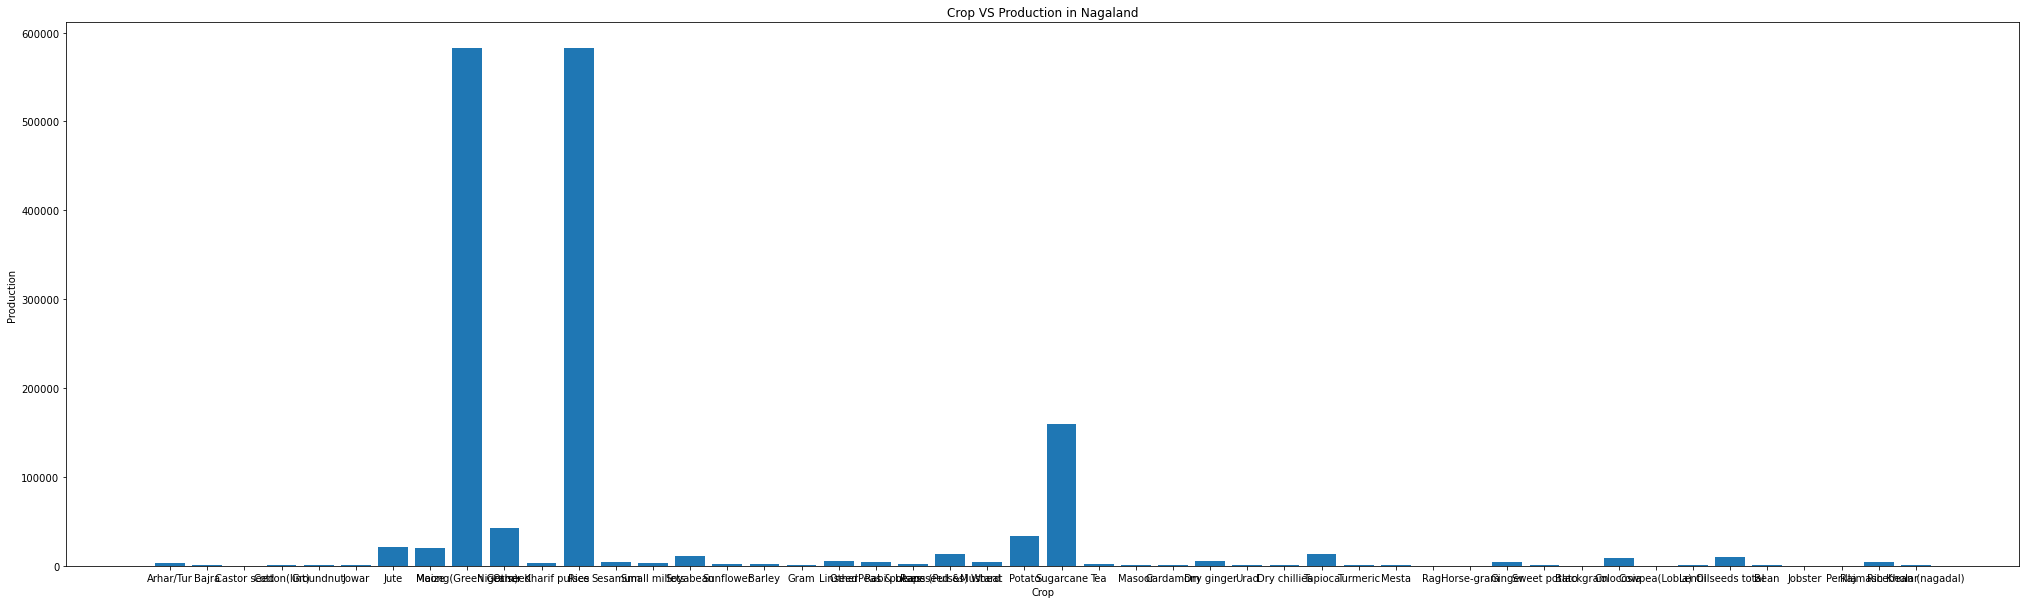

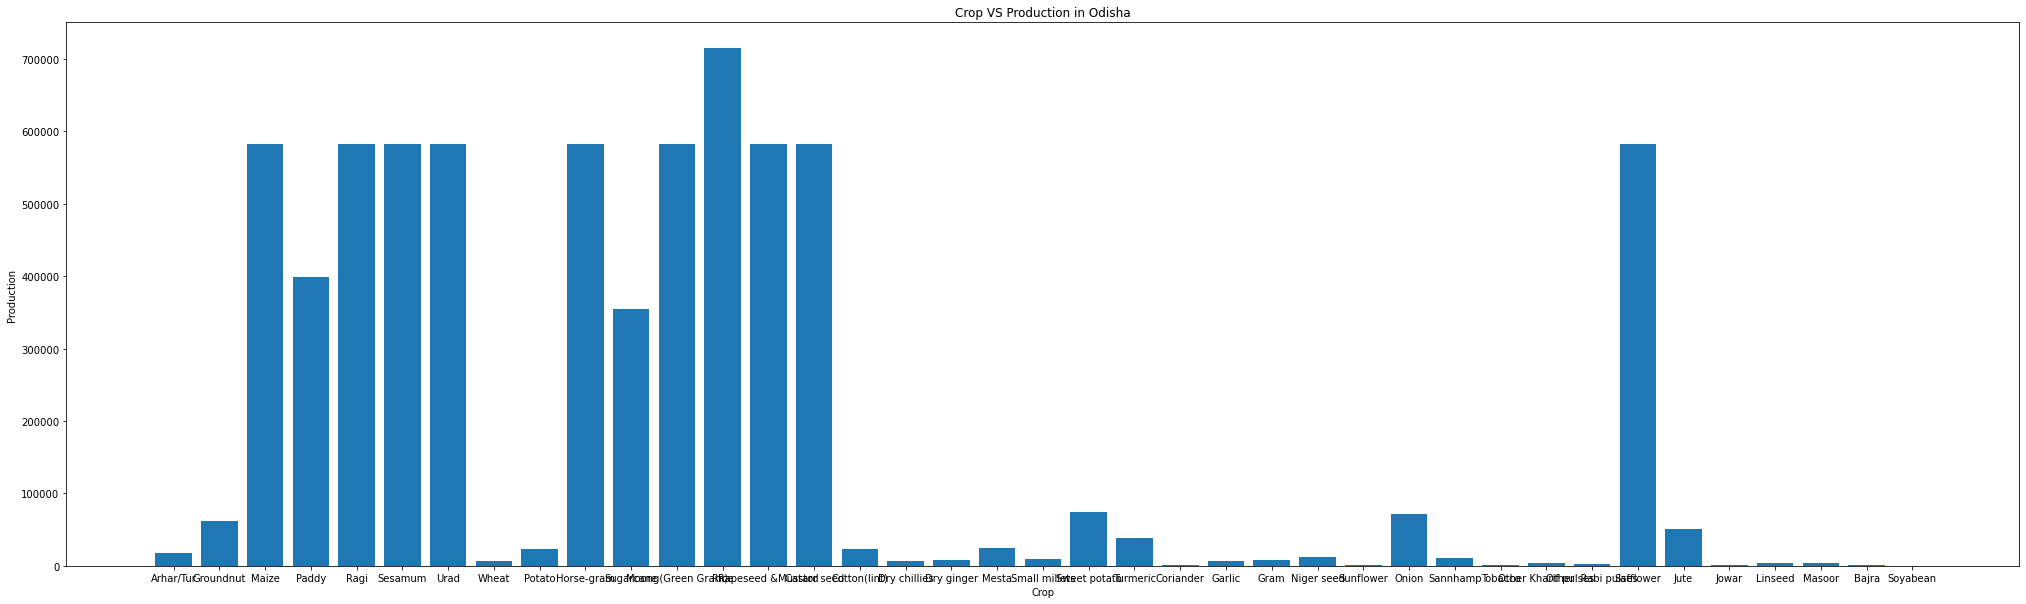

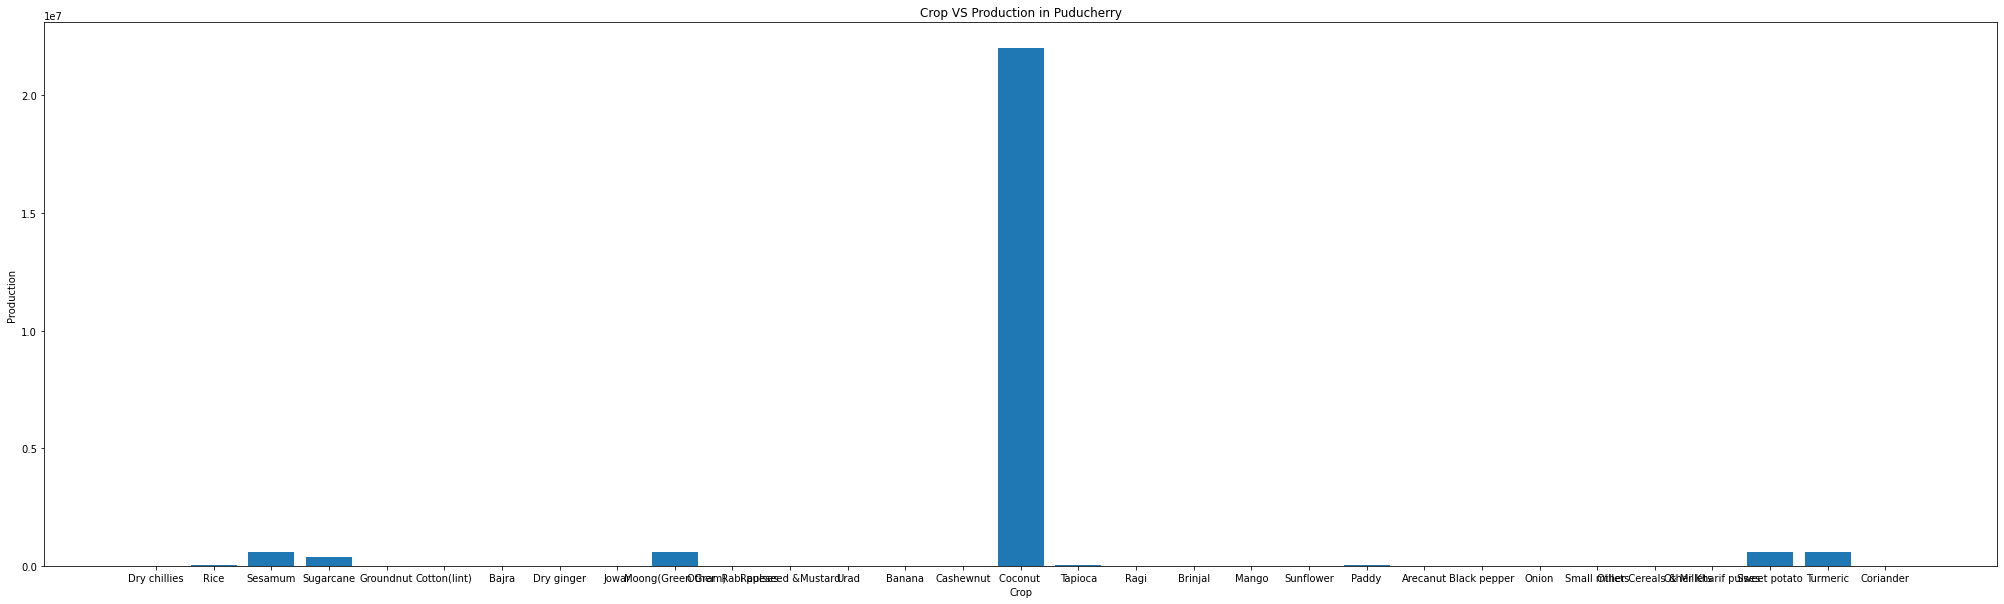

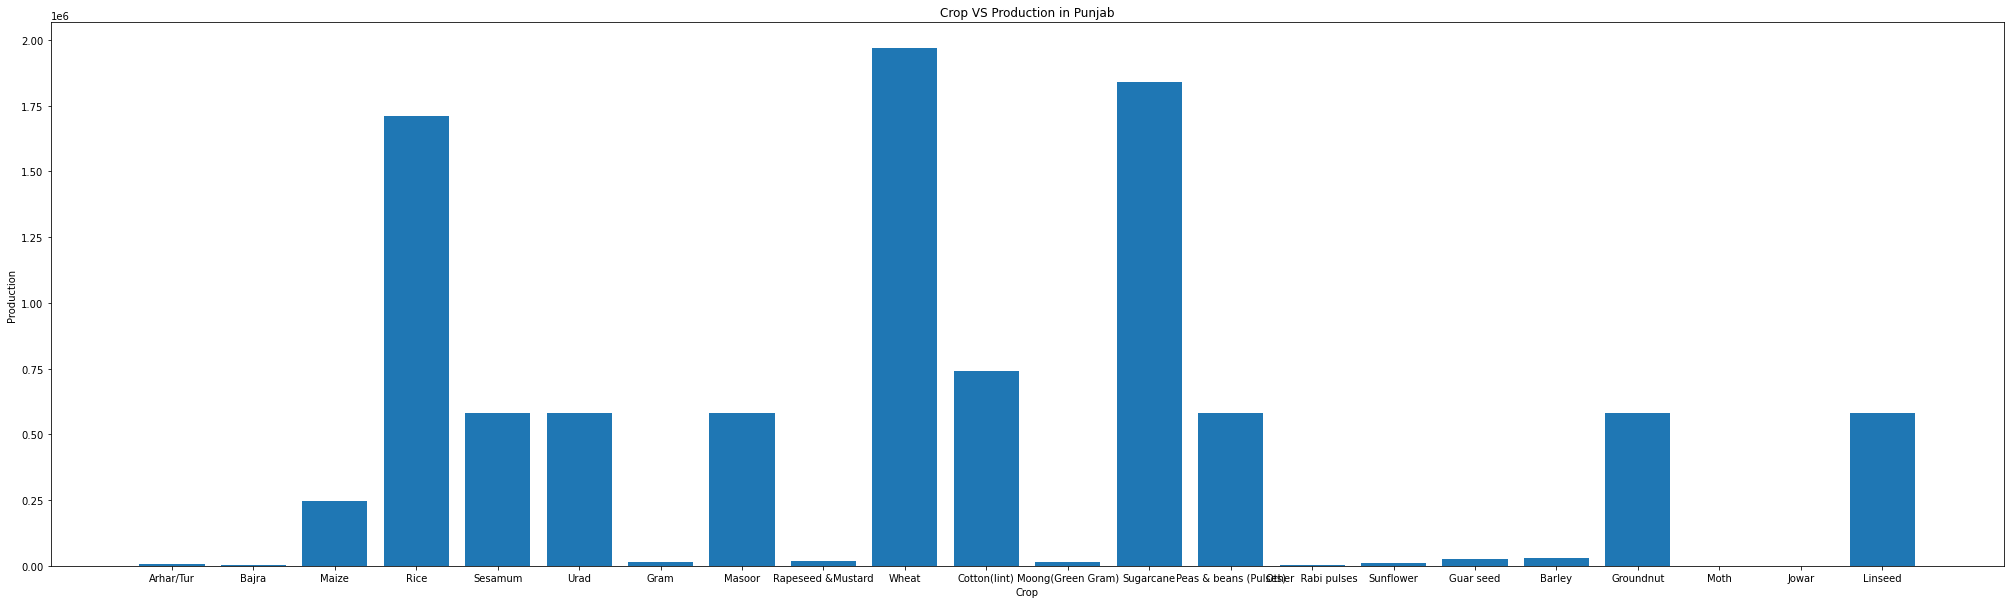

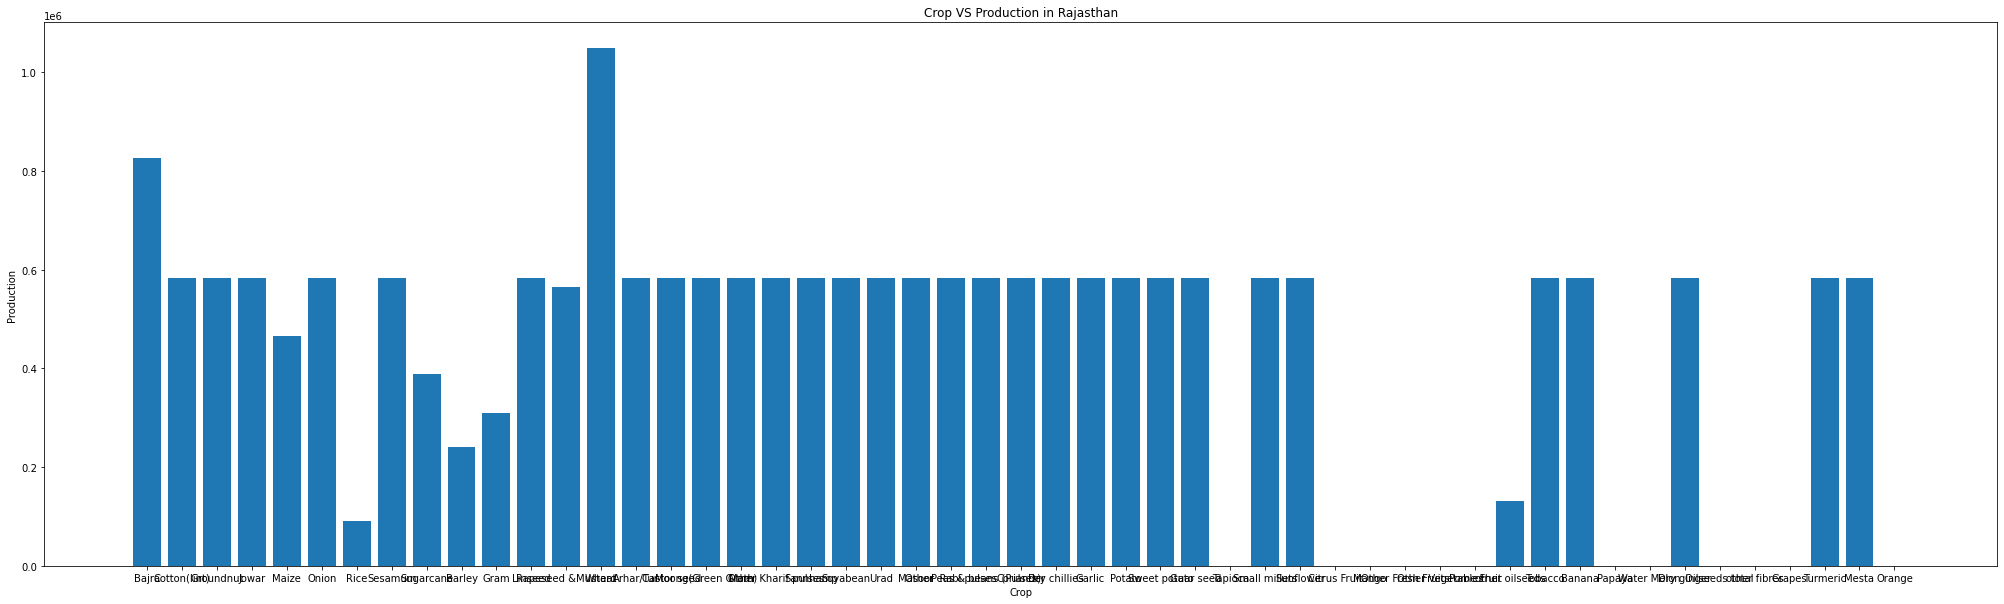

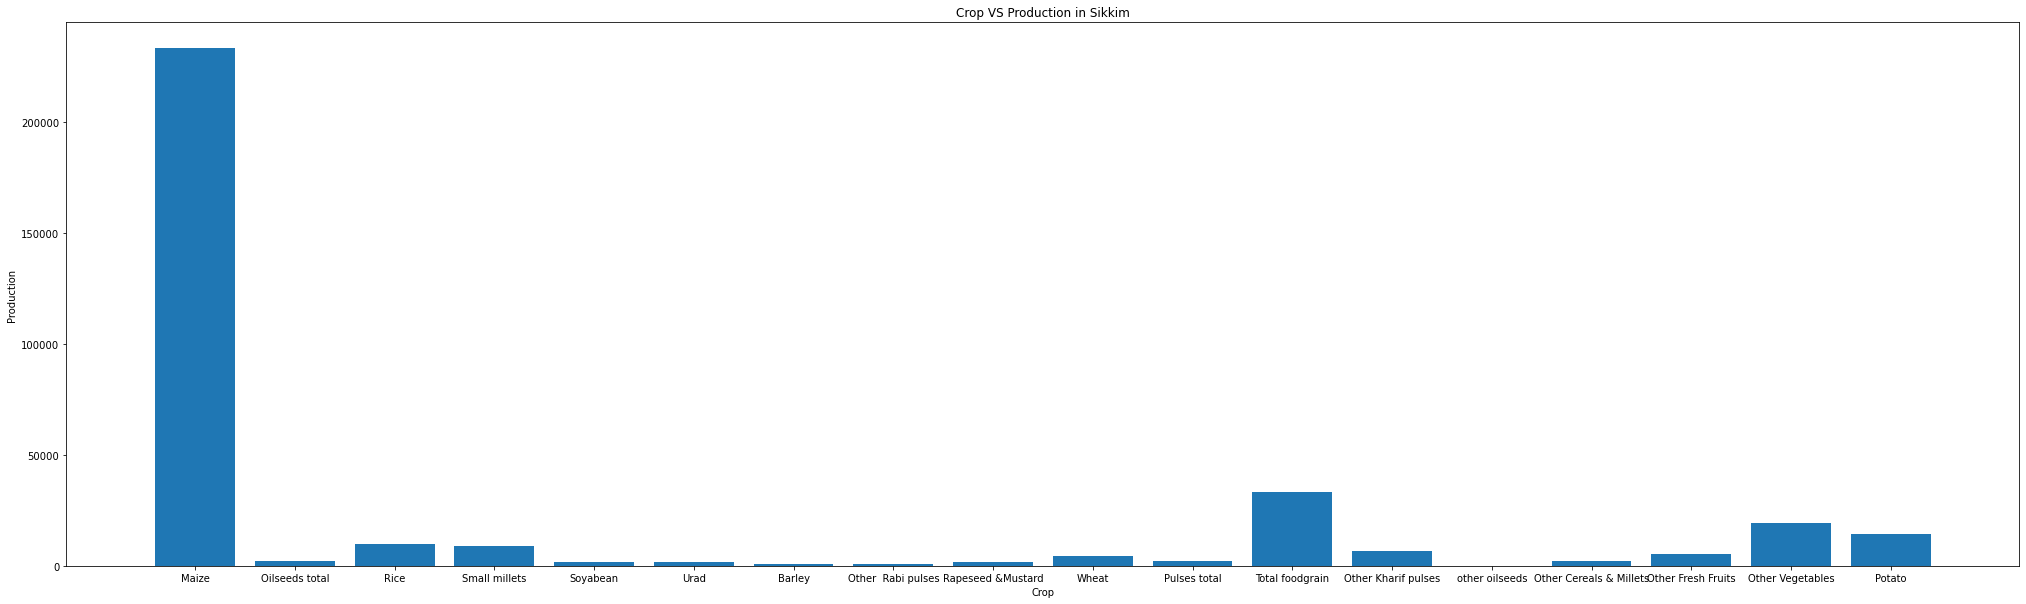

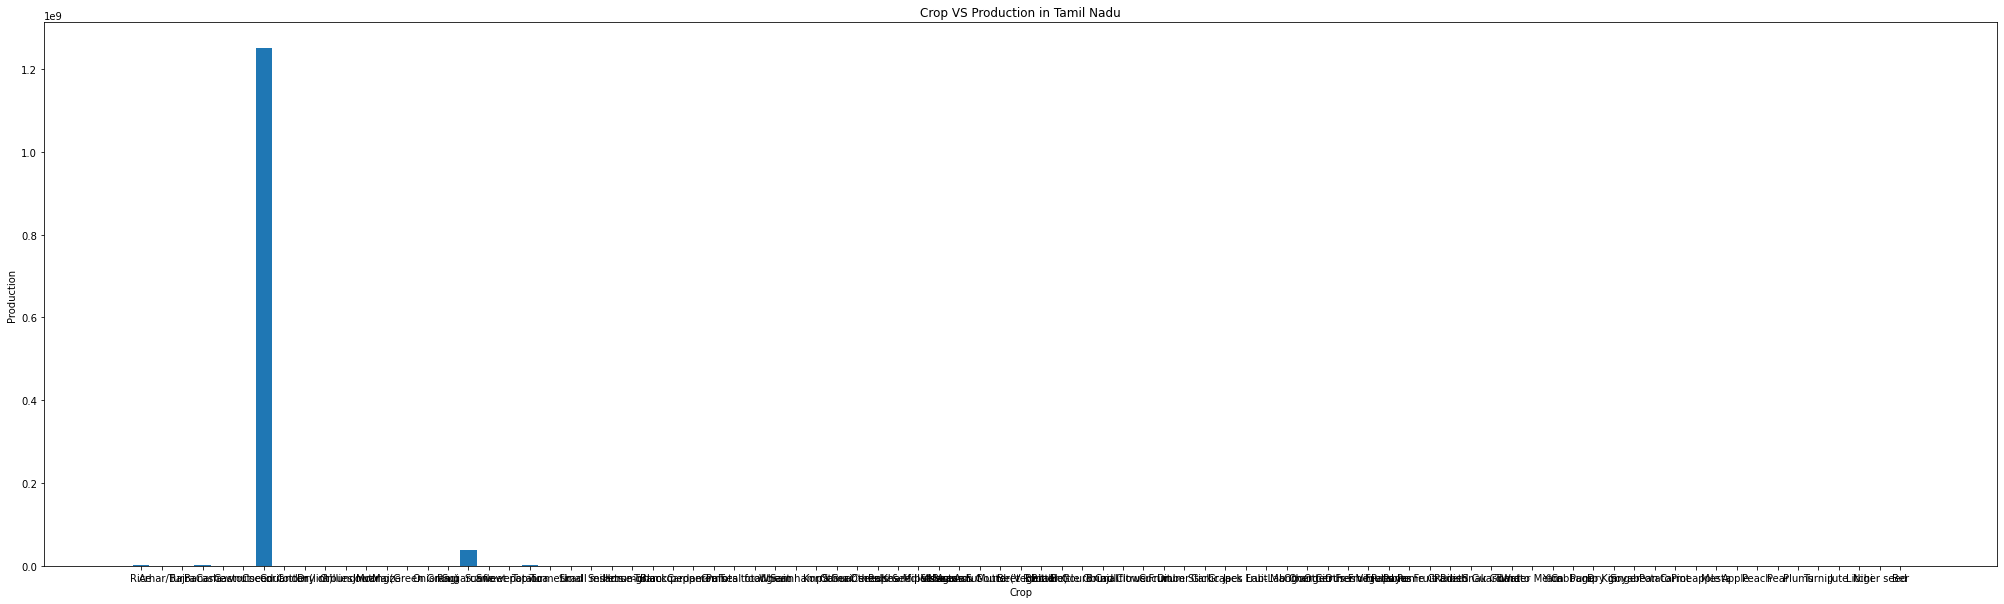

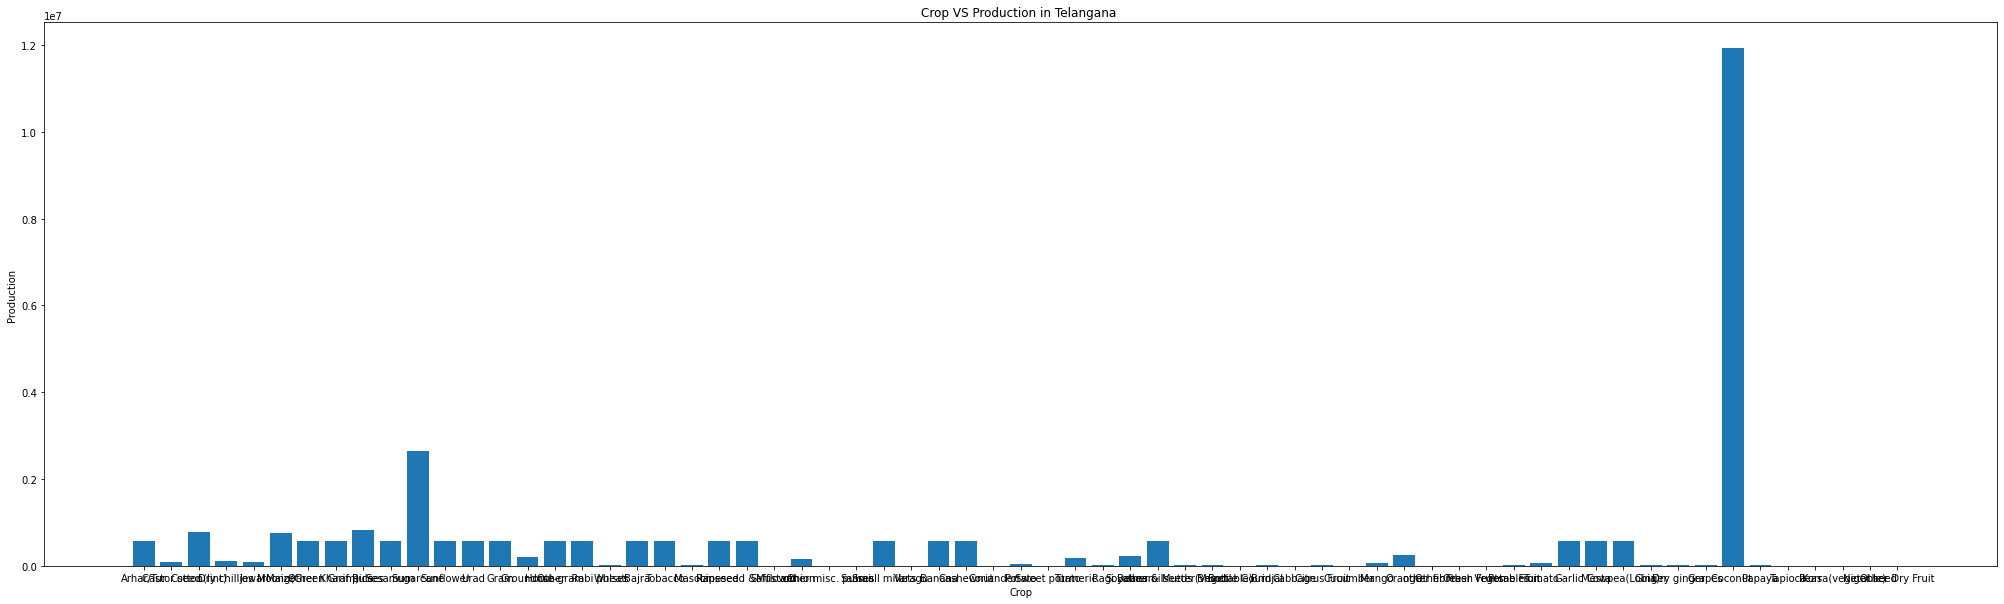

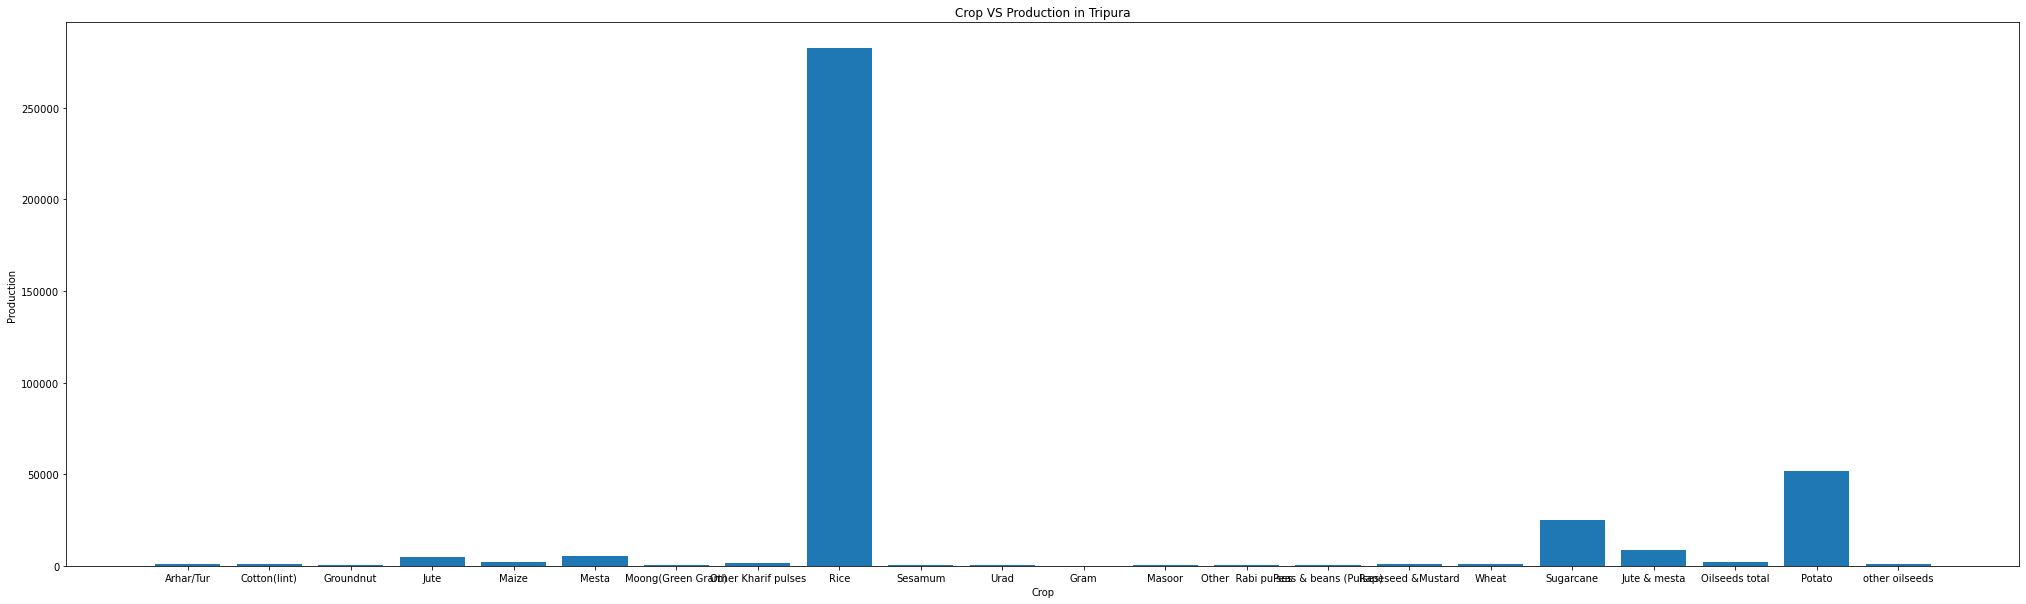

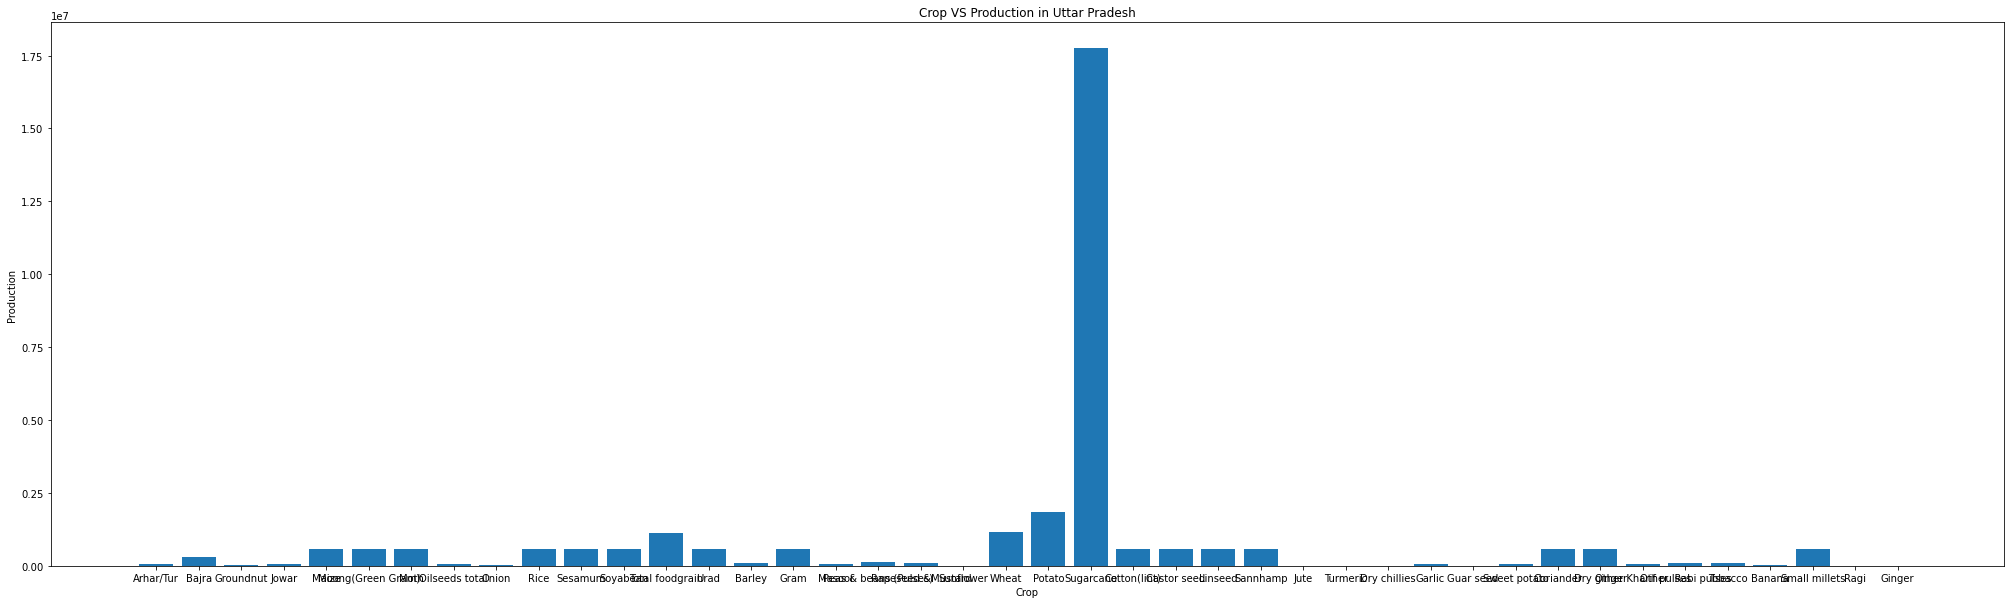

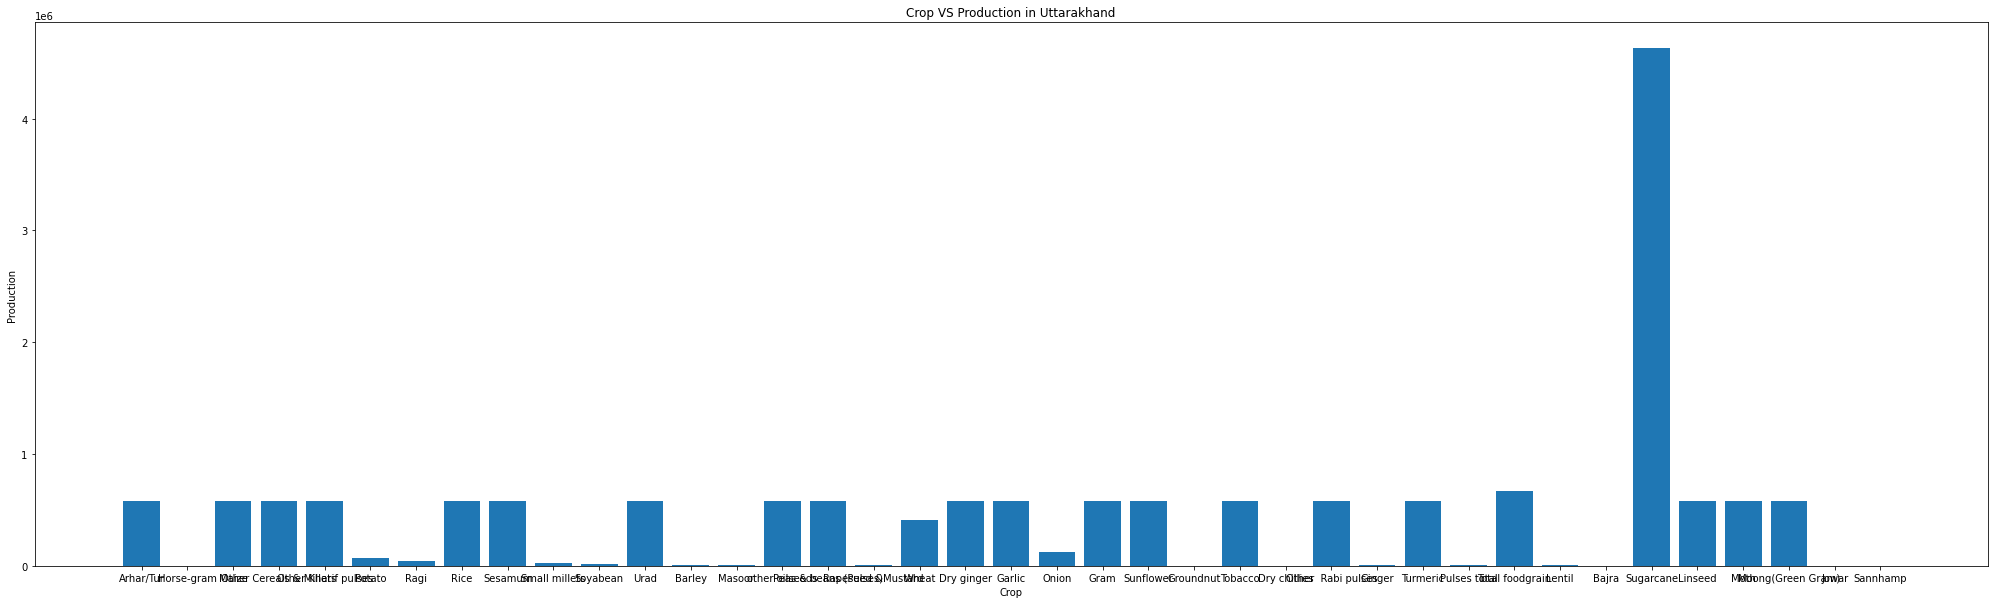

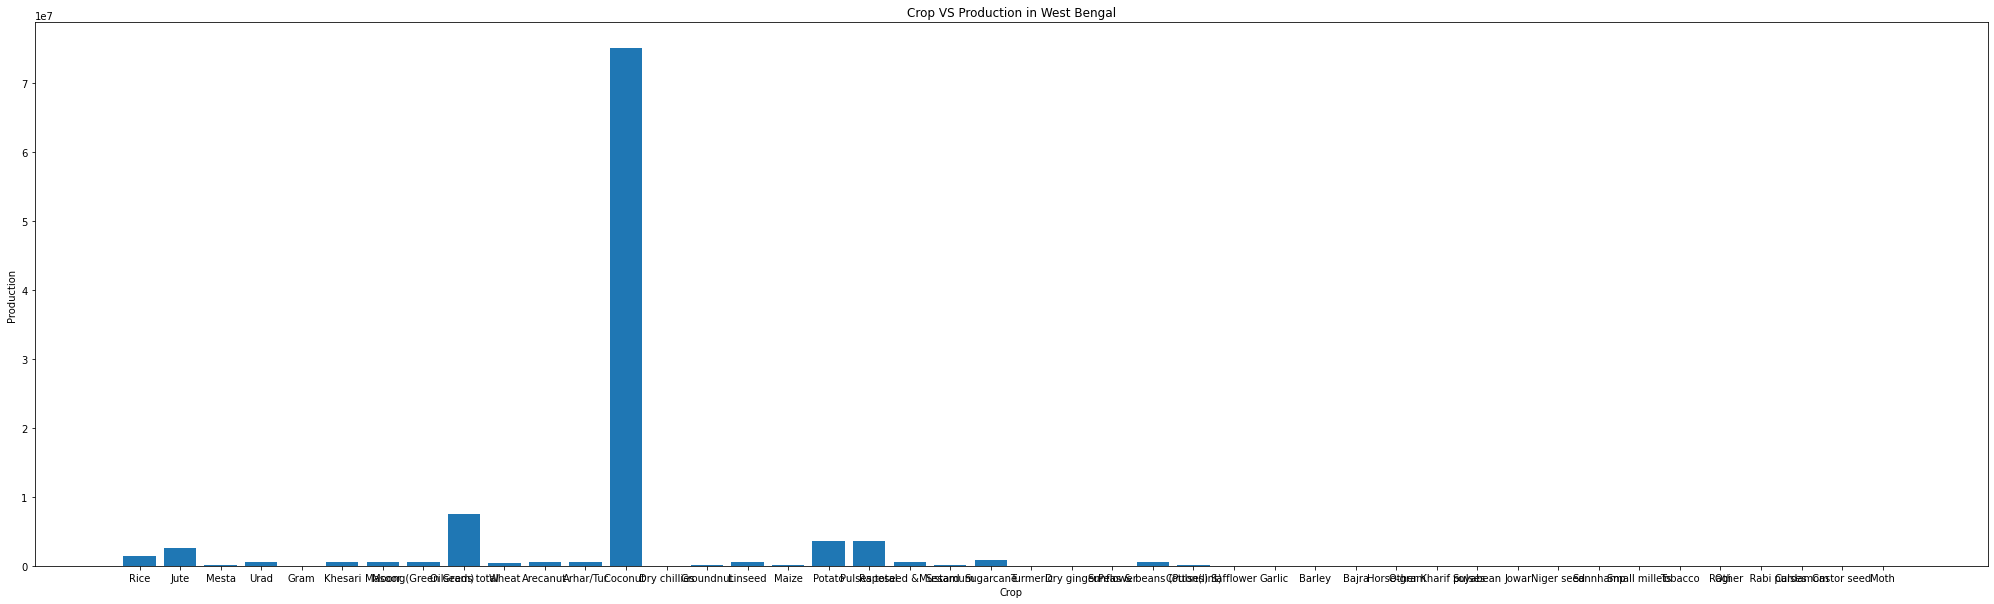

In [124]:
df=pd.DataFrame(columns=['Production','Crop'])
for i in grp1.State_Name:
    df=(df2[df2.State_Name==i])
    plt.figure(figsize=(35,10))
    plt.bar(df.Crop,df.Production)
    plt.title('Crop VS Production in {0}'.format(i))
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.show()

#### storing the needed dataframes in other variables ,so that they won't be changed

In [53]:
df1.columns=['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2', 'Yield ']
i=df1

#### sort_values will sort the dataframe according to the passed column

In [54]:
i.sort_values("Yield ",inplace=True,ascending=False)
g=df1

#### droping the duplicate values

In [55]:
g.drop_duplicates(subset="State",inplace=True)
g.drop(['Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2','Yield '],axis=1,inplace=True)
print("these crops are the best crops to grow in these states")
g

these crops are the best crops to grow in these states


,Crop,State
44,SUGARCANE,Tamil Nadu
41,SUGARCANE,Karnataka
42,SUGARCANE,Andhra Pradesh
43,SUGARCANE,Maharashtra
40,SUGARCANE,Uttar Pradesh
33,PADDY,Punjab
20,MAIZE,Bihar
32,PADDY,West Bengal
48,WHEAT,Rajasthan
31,PADDY,Orissa


#### convert production into yield and drop duplicat values and drop some columns from dataframe and store it in another dataframe

In [125]:
df2['Yield']=(df2['Production']/df2['Area'])
o=df2
o.sort_values("Yield",inplace=True,ascending=False)
h=o
h.drop_duplicates(subset="State_Name",inplace=True)
h.drop(['District_Name','Crop_Year','Season','Area','Production','Yield'],axis=1,inplace=True)
h

,State_Name,Crop
100325,Kerala,Sugarcane
150198,Odisha,Ragi
168710,Rajasthan,Garlic
207817,Uttar Pradesh,Sannhamp
86001,Karnataka,Cardamom
232313,Uttarakhand,Gram
115296,Madhya Pradesh,Castor seed
182313,Tamil Nadu,Rapeseed &Mustard
53837,Chhattisgarh,Coriander
66268,Haryana,Onion


#### sort dataframe by using production and drop duplicat values and drop some columns from dataframe and store it in another dataframe

In [57]:
k=df4
k.sort_values("Production",inplace=True,ascending=False)
print(k)
j=k
j.drop_duplicates(subset="Crop",inplace=True)
t=j['Production']
j.drop(['Cropconversion','Production'],axis=1,inplace=True)
print("the factors affecting the most are")
j

          Rainfall  Temperature   Ph               Crop  Production  \
156677  1330.00000       31.000  7.5          Sugarcane   955.75034   
156676  1320.00000       31.000  7.5          Sugarcane   907.89016   
156675  1310.00000       31.000  7.5          Sugarcane   865.32060   
156674  1300.00000       31.000  7.5          Sugarcane   842.22092   
156673  1290.00000       31.000  7.5          Sugarcane   821.44347   
...            ...          ...  ...                ...         ...   
57458    400.05866       18.000  6.0              Jowar     0.00117   
52622    100.01130       25.010  5.0          Guar seed     0.00113   
86452    600.06506       21.005  6.3  Moong(Green Gram)     0.00081   
86451    600.04113       21.000  6.3  Moong(Green Gram)     0.00051   
52621    100.00340       25.000  5.0          Guar seed     0.00034   

           Cropconversion  
156677          Sugarcane  
156676          Sugarcane  
156675          Sugarcane  
156674          Sugarcane  
156673 

,Rainfall,Temperature,Ph,Crop
156677,1330.00000,31.00000,7.5,Sugarcane
103473,715.00000,25.00000,7.1,Onion
104105,2140.00000,25.80000,6.6,Papaya
30176,911.00000,27.00000,7.3,Cotton
8309,626.00000,26.00000,7.2,Banana
167642,1157.09700,30.00000,6.1,Tapioca
86449,755.00000,26.00000,6.0,Mesta
137416,810.00000,23.00000,6.5,Sannhamp
167917,515.00000,20.00000,6.2,Tomato
44095,740.00000,20.30000,7.5,Grapes


In [58]:
print("shapes of different dataframes ----->")
df1.shape
df2.shape
df3.shape
df4.shape
df5.shape

shapes of different dataframes ----->


(58, 2)

In [59]:
df=df4
df.drop('Crop',axis=1,inplace=True)
df.isnull().sum()

Rainfall       0
Temperature    0
Ph             0
dtype: int64

#### dtypes tell about the datatype of each column 

In [60]:
print("datatypes are:  ",df.dtypes)

datatypes are:   Rainfall       float64
Temperature    float64
Ph             float64
dtype: object


#### devide data into train data and test data

In [61]:
x_train,x_test,y_train,y_test=train_test_split(df,t,test_size=0.2)

  ##### max_depth= depth of the trees
  ##### random_state ,if int then off
  ##### n_esti...= no of trees

In [62]:
reg=RandomForestRegressor(max_depth=7,random_state=42,n_estimators=58)

#### fitting the model

In [63]:
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=58, random_state=42)

#### predicted values

In [64]:
y_pred=reg.predict(x_test)

In [65]:
e=pd.read_csv('crop_production.csv')

#### filling the nan values with mean

In [66]:
e.fillna(e["Production"].mean(),inplace=True)

#### it creates a new column named as 'Yield' and copy dataframe from e -> o and sort dataframe by Yield column and drop duplicates values

In [67]:
e['Yield']=(e['Production']/e['Area'])
o=e
o.sort_values("Yield",inplace=True,ascending=False)
n=o
n.drop_duplicates(subset="District_Name",inplace=True)

#### drop unwanted features

In [68]:
n.drop(['State_Name','Crop_Year','Season','Area','Production','Yield'],axis=1,inplace=True)
n

,District_Name,Crop
100325,KOZHIKODE,Sugarcane
100627,MALAPPURAM,Sugarcane
101658,THIRUVANANTHAPURAM,Sugarcane
101871,THRISSUR,Sugarcane
98558,ERNAKULAM,Sugarcane
...,...,...
76143,GUMLA,Potato
74381,GANDERBAL,Potato
191872,HYDERABAD,Rice
75233,RAMBAN,Wheat


In [130]:
i=input("enter district name: ")

enter district name:  THRISSUR


#### using try and except - for q5 

In [131]:
try:
     # it will tell about that whether it has any true value or not
    t=(n['District_Name']==i).any()
     # if true then it will be executed 
    if t:
        h=n[n['District_Name']==i]
        print("Crop for district ",i," with index is",h['Crop'])
    else:
        # it will lead the control flow to the except block
        raise exception
except:
    print("entered district is not in the dataset")

Crop for district  THRISSUR  with index is 101871    Sugarcane
Name: Crop, dtype: object


In [75]:
d=pd.read_csv('state_wise_crop_production.csv')

#### new column as Cost 

In [76]:
d['Cost']=(d['Cost of Cultivation (`/Hectare) A2+FL']+d['Cost of Cultivation (`/Hectare) C2']+d['Cost of Production (`/Quintal) C2'])

#### dropping the unwanted features

In [79]:
d.columns=['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2', 'Yield ','Cost']

In [80]:
d.drop(['Cost of Cultivation (`/Hectare) A2+FL','Cost of Cultivation (`/Hectare) C2','Cost of Production (`/Quintal) C2'],axis=1,inplace=True)
d.sort_values(["Yield ","Cost"],inplace=True,ascending=False)
d.drop_duplicates(subset="State",inplace=True)
d

,Crop,State,Yield,Cost
44,SUGARCANE,Tamil Nadu,1015.45,155446.12
41,SUGARCANE,Karnataka,986.21,142507.74
42,SUGARCANE,Andhra Pradesh,757.92,148183.51
43,SUGARCANE,Maharashtra,744.01,143583.11
40,SUGARCANE,Uttar Pradesh,448.89,69871.47
33,PADDY,Punjab,67.41,71115.85
20,MAIZE,Bihar,42.95,33776.05
32,PADDY,West Bengal,39.04,58508.43
48,WHEAT,Rajasthan,37.19,49679.02
31,PADDY,Orissa,32.42,44102.14


In [135]:
i=input("enter state from the above table:  ")

enter state from the above table:   Gujarat


#### using try and except - for q5 

In [136]:
try:
    # it will tell about that whether it has any true value or not
    t=(d['State']==i).any()
    # if true then it will be executed 
    if t:
        f=d[d['State']==i]
        print("suitable crop for ",i,"with index is",f['Crop'])
    else:
        # it will lead the control flow to the except block
        raise exception
except:
    print("entered state is not in the dataset")

entered state is not in the dataset


In [83]:
print("solution of ques 5 is done in above quetions ,if there is not a feature matching with the dataset values ,then it will tell the user about it.")

solution of ques 5 is done in above quetions ,if there is not a feature matching with the dataset values ,then it will tell the user about it.


In [86]:
l=pd.read_csv('cropproductiononvariousfactors.csv')
l.sort_values("Production",inplace=True,ascending=False)
l.sort_values("Rainfall",inplace=True,ascending=True)
l.drop_duplicates(subset="Crop",inplace=True)
l.drop(['Rainfall','Temperature','Ph'],axis=1,inplace=True)
print("crops which are being grown by farmers ,producion and crop conversion are: ")
l

crops which are being grown by farmers ,producion and crop conversion are: 


,Crop,Production,Cropconversion
52621,Guar seed,0.00034,Guar seed
16841,Cauliflower,8.58333,Cauliflower
64270,Jute,0.27405,Jute
108442,Potato,0.03019,Potato
104107,Peas & beans (Pulses),0.04762,Peas & beans (Pulses)
12353,Bean,1.33333,Bean
13593,Cabbage,10.00556,Cabbage
57458,Jowar,0.00117,Jowar
67023,Khesari,0.00179,Khesari
0,Bajra,0.00690,Bajra


#### as info about the soil health and cost associated with soil improvement both are not available , so I will be telling about the ph of the soil 

In [89]:
x=pd.read_csv('cropproductiononvariousfactors.csv')
x.sort_values("Production",inplace=True,ascending=False)
x.drop_duplicates(subset="Crop",inplace=True)
x.drop(['Rainfall','Temperature','Production'],axis=1,inplace=True)
print("ph of the soil should be this which is given in the following dataset,for prescribed crops: ")
x

ph of the soil should be this which is given in the following dataset,for prescribed crops: 


,Ph,Crop,Cropconversion
156677,7.5,Sugarcane,Sugarcane
103473,7.1,Onion,Onion
104105,6.6,Papaya,Papaya
30176,7.3,Cotton,Cotton
8309,7.2,Banana,Banana
167642,6.1,Tapioca,Tapioca
86449,6.0,Mesta,Mesta
137416,6.5,Sannhamp,Sannhamp
167917,6.2,Tomato,Tomato
44095,7.5,Grapes,Grapes


### create new dataframe and sort that dataframe by production and drop duplicate and unwanted values

In [90]:
l=pd.read_csv('cropproductiononvariousfactors.csv')
p=l
p.sort_values("Production",inplace=True,ascending=False)
m=p
m.drop_duplicates(subset="Crop",inplace=True)
d=m['Production']
q=l
q.drop(['Crop','Cropconversion'],axis=1,inplace=True)
print(q)

          Rainfall  Temperature   Ph  Production
156677  1330.00000     31.00000  7.5   955.75034
103473   715.00000     25.00000  7.1   204.07895
104105  2140.00000     25.80000  6.6   134.14264
30176    911.00000     27.00000  7.3   100.57670
8309     626.00000     26.00000  7.2    88.00000
167642  1157.09700     30.00000  6.1    70.51609
86449    755.00000     26.00000  6.0    68.00000
137416   810.00000     23.00000  6.5    55.55000
167917   515.00000     20.00000  6.2    50.20508
44095    740.00000     20.30000  7.5    42.92783
37011   1634.00000     27.64522  6.3    39.06545
166061  1224.00000     25.00000  6.1    38.12500
13661    564.00000     23.00000  6.1    29.09317
84705    760.00000     29.70634  6.4    25.67709
171972  1730.00000     24.00000  6.6    25.00000
13591    847.43119     24.00000  6.0    24.74312
33884    718.00000     22.00600  6.5    23.63636
65692    515.00000     31.22999  6.5    22.76362
67139   1048.00000     24.00000  6.5    19.45188
5221     744.01857  

In [91]:
print("linear regression")

x_train,x_test,y_train,y_test=train_test_split(q,d,test_size=0.2,random_state=100)
reg=LinearRegression()
reg.fit(x_train,y_train)
print("score of linear regression in this project",(reg.score(x_test,y_test))*100)

linear regression
score of linear regression in this project 100.0


#### i've used multiple regression in it because it has several independent variablesand one dependent variable

In this project we use RnadomForest model and multiple Regression model to evaluate which crop is best in state and district and find features in which crop productionn is dependent.